# Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.



When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

-If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 



When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# Data Understanding

This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables

## Problem Statement - II

## Results Expected by Learners
Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

###### Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

##### Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

## EDA Assignment

### importing all modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
pd.set_option ('display.max_rows',1000)
pd.set_option('display.max_column',1000)


## Dataset - 1  "application_data.csv"

## 1. Reading and understanding the data

In [4]:
df_application = pd.read_csv("application_data.csv")
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
df_application.shape

(307511, 122)

In [7]:
df_application.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

#### -There are 122 columns having various data type like object,int,float and 305711 rows

In [8]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,104582.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307509.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,134133.00000,306851.00000,246546.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,159080.00000,306490.00000,306490.00000,306490.00000,306490.00000,307510.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,12.06109,1.00000,0.81989,0.19937,0.99813,0.28107,0.05672,2.15267,2.05246,2.03152,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.50213,0.51439,0.51085,0.11744,0.08844,0.97773,0.75247,0.04462,0.07894,0.14972,0.22628,0.23189,0.06633,0.10077,0.10740,0.00881,0.02836,0.11423,0.08754,0.97707,0.75964,0.04255,0.07449,0.14519,0.22232,0.22806,0.06496,0.10564,0.10598,0.00808,0.02702,0.11785,0.08795,0.97775,0.75575,0.04460,0.07808,0.14921,0.22590,0.23162,0.06717,0.10195,0.10861,0.00865,0.02824,0.10255,1.42225,0.14342,1.40529,0.10005,-962.85879,0.00004,0.71002,0.0

#### INSIGHT
- There are 122 columns and 307511 rows.
- There columns having negative, postive values which includes days. fixing is required
- There are columns with very hight values, columns related to Amount(Price). standardising is required

In [9]:
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Data Cleaning & Manipulation

In [10]:
def null_values(df_application):
    return round((df_application.isnull().sum()*100/len(df_application)).sort_values(ascending = False),2)
    

In [11]:
null_values(df_application)

COMMONAREA_MEDI                69.87000
COMMONAREA_AVG                 69.87000
COMMONAREA_MODE                69.87000
NONLIVINGAPARTMENTS_MODE       69.43000
NONLIVINGAPARTMENTS_MEDI       69.43000
NONLIVINGAPARTMENTS_AVG        69.43000
FONDKAPREMONT_MODE             68.39000
LIVINGAPARTMENTS_MEDI          68.35000
LIVINGAPARTMENTS_MODE          68.35000
LIVINGAPARTMENTS_AVG           68.35000
FLOORSMIN_MEDI                 67.85000
FLOORSMIN_MODE                 67.85000
FLOORSMIN_AVG                  67.85000
YEARS_BUILD_MEDI               66.50000
YEARS_BUILD_AVG                66.50000
YEARS_BUILD_MODE               66.50000
OWN_CAR_AGE                    65.99000
LANDAREA_MODE                  59.38000
LANDAREA_AVG                   59.38000
LANDAREA_MEDI                  59.38000
BASEMENTAREA_MEDI              58.52000
BASEMENTAREA_AVG               58.52000
BASEMENTAREA_MODE              58.52000
EXT_SOURCE_1                   56.38000
NONLIVINGAREA_MEDI             55.18000


In [12]:
null_col_40 = null_values(df_application)[null_values(df_application)>40]

In [13]:
null_col_40

COMMONAREA_MEDI                69.87000
COMMONAREA_AVG                 69.87000
COMMONAREA_MODE                69.87000
NONLIVINGAPARTMENTS_MODE       69.43000
NONLIVINGAPARTMENTS_MEDI       69.43000
NONLIVINGAPARTMENTS_AVG        69.43000
FONDKAPREMONT_MODE             68.39000
LIVINGAPARTMENTS_MEDI          68.35000
LIVINGAPARTMENTS_MODE          68.35000
LIVINGAPARTMENTS_AVG           68.35000
FLOORSMIN_MEDI                 67.85000
FLOORSMIN_MODE                 67.85000
FLOORSMIN_AVG                  67.85000
YEARS_BUILD_MEDI               66.50000
YEARS_BUILD_AVG                66.50000
YEARS_BUILD_MODE               66.50000
OWN_CAR_AGE                    65.99000
LANDAREA_MODE                  59.38000
LANDAREA_AVG                   59.38000
LANDAREA_MEDI                  59.38000
BASEMENTAREA_MEDI              58.52000
BASEMENTAREA_AVG               58.52000
BASEMENTAREA_MODE              58.52000
EXT_SOURCE_1                   56.38000
NONLIVINGAREA_MEDI             55.18000


In [14]:
print("Null value is more than 40%: ",len(null_col_40))

Null value is more than 40%:  49


#### INSIGHT
- There are 49 columns having null values more than 40% which are related to different area sizes on apartment owned/rented by the loan applicant

In [15]:
null_col_40.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI

In [16]:
df_application=df_application.drop(columns=null_col_40.index)

In [17]:
df_application.shape

(307511, 73)

#### Insight 
- After after dropping 49 columns we are left with 73 columns

In [18]:
null_values(df_application)

OCCUPATION_TYPE               31.35000
EXT_SOURCE_3                  19.83000
AMT_REQ_CREDIT_BUREAU_YEAR    13.50000
AMT_REQ_CREDIT_BUREAU_MON     13.50000
AMT_REQ_CREDIT_BUREAU_WEEK    13.50000
AMT_REQ_CREDIT_BUREAU_DAY     13.50000
AMT_REQ_CREDIT_BUREAU_HOUR    13.50000
AMT_REQ_CREDIT_BUREAU_QRT     13.50000
NAME_TYPE_SUITE                0.42000
OBS_30_CNT_SOCIAL_CIRCLE       0.33000
DEF_30_CNT_SOCIAL_CIRCLE       0.33000
OBS_60_CNT_SOCIAL_CIRCLE       0.33000
DEF_60_CNT_SOCIAL_CIRCLE       0.33000
EXT_SOURCE_2                   0.21000
AMT_GOODS_PRICE                0.09000
AMT_ANNUITY                    0.00000
CNT_FAM_MEMBERS                0.00000
DAYS_LAST_PHONE_CHANGE         0.00000
NAME_INCOME_TYPE               0.00000
FLAG_OWN_REALTY                0.00000
TARGET                         0.00000
FLAG_EMAIL                     0.00000
FLAG_PHONE                     0.00000
FLAG_CONT_MOBILE               0.00000
NAME_CONTRACT_TYPE             0.00000
FLAG_WORK_PHONE          

In [19]:
unwanted_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_application.drop(labels=unwanted_columns,axis=1,inplace=True)

In [20]:
df_application.shape

(307511, 43)

### . Imputing values

In [21]:
df_application["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                26.13964
Sales staff             15.20557
Core staff              13.05892
Managers                10.12268
Drivers                  8.81158
High skill tech staff    5.39030
Accountants              4.64807
Medicine staff           4.04367
Security staff           3.18350
Cooking staff            2.81641
Cleaning staff           2.20396
Private service staff    1.25616
Low-skill Laborers       0.99138
Waiters/barmen staff     0.63850
Secretaries              0.61813
Realty agents            0.35572
HR staff                 0.26667
IT staff                 0.24915
Name: OCCUPATION_TYPE, dtype: float64

### Insight 

In [22]:
df_application["OCCUPATION_TYPE"] = df_application["OCCUPATION_TYPE"].fillna("Unknown") 

In [23]:
df_application["OCCUPATION_TYPE"].isnull().sum() 

0

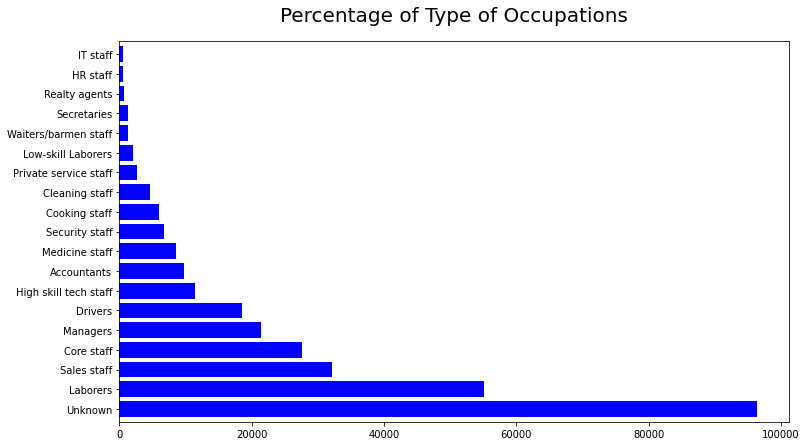

In [24]:
plt.figure(figsize = [12,7])
(df_application["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "blue",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

- Highest percentage of values belongs to Unknown group and Secons belongs to Laborers

In [25]:
df_application['EXT_SOURCE_3'].head()

0   0.13938
1       nan
2   0.72957
3       nan
4       nan
Name: EXT_SOURCE_3, dtype: float64

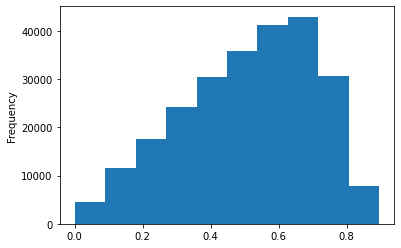

In [26]:
df_application['EXT_SOURCE_3'].plot.hist()
plt.show()


In [27]:
df_application.shape

(307511, 43)

###  Now let's move to other Amount columns :

In [28]:
amt_columns=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [29]:
df_application.fillna(df_application[amt_columns].median(),inplace=True)

In [30]:
null_values(df_application).head(7)

EXT_SOURCE_3               19.83000
NAME_TYPE_SUITE             0.42000
DEF_60_CNT_SOCIAL_CIRCLE    0.33000
OBS_60_CNT_SOCIAL_CIRCLE    0.33000
DEF_30_CNT_SOCIAL_CIRCLE    0.33000
OBS_30_CNT_SOCIAL_CIRCLE    0.33000
EXT_SOURCE_2                0.21000
dtype: float64

In [31]:
df_application=df_application.drop(columns="EXT_SOURCE_3" )

In [32]:
null_values(df_application).head(7)

NAME_TYPE_SUITE            0.42000
DEF_60_CNT_SOCIAL_CIRCLE   0.33000
OBS_60_CNT_SOCIAL_CIRCLE   0.33000
DEF_30_CNT_SOCIAL_CIRCLE   0.33000
OBS_30_CNT_SOCIAL_CIRCLE   0.33000
EXT_SOURCE_2               0.21000
AMT_GOODS_PRICE            0.09000
dtype: float64

- some missing value coloumns but we will not impute them as the missing value count very less.

In [33]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,306851.00000,306490.00000,306490.00000,306490.00000,306490.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.51439,1.42225,0.14342,1.40529,0.10005,0.00554,0.00606,0.02972,0.23129,0.22963,1.77846
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.73732,369446.46054,0.01383,4363.98863,141275.76652,3522.88632,1509.45042,3.26583,0.12213,0.21953,0.19750,0.26844,0.42112,0.38382,0.19106,2.40099,0.44670,2.37980,0.36229,0.07801,0.10304,0.19073,0.85681,0.74406,1.76552
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,0.00029,-25229.00000,-17912.00000,-24672.00000,-7197.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,0.01001,-19682.00000,-2760.00000,-7479.50000,-4299.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.39246,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
50%,278202.00000,0.00000,0.00000,147150.00000,513531.00000,24903.00000,450000.00000,0.01885,-15750.00000,-1213.00000,-4504.00000,-3254.00000,12.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.56596,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367142.50000,0.00000,1.00000,202500.00000,808650.00000,34596.00000,679500.00000,0.02866,-12413.00000,-289.00000,-2010.00000,-1720.00000,14.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.66362,2.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7489.00000,365243.00000,0.00000,0.00000,23.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.85500,348.00000,34.00000,344.00000,24.00000,4.00000,9.00000,8.00000,27.00000,261.00000,25.00000


- from describe we get that days are in negative that is not usual, so to correct it we use absolute function as below**

### Now Deal With DAY Columns:

In [34]:
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]

df_application[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.00000,307511.00000,307511.00000,307511.00000
mean,-16036.99507,63815.04590,-4986.12033,-2994.20237
std,4363.98863,141275.76652,3522.88632,1509.45042
min,-25229.00000,-17912.00000,-24672.00000,-7197.00000
25%,-19682.00000,-2760.00000,-7479.50000,-4299.00000
50%,-15750.00000,-1213.00000,-4504.00000,-3254.00000
75%,-12413.00000,-289.00000,-2010.00000,-1720.00000
max,-7489.00000,365243.00000,0.00000,0.00000


In [35]:
df_application[days_col]=abs(df_application[days_col])

In [36]:
df_application[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.00000,307511.00000,307511.00000,307511.00000
mean,16036.99507,67724.74215,4986.12033,2994.20237
std,4363.98863,139443.75181,3522.88632,1509.45042
min,7489.00000,0.00000,0.00000,0.00000
25%,12413.00000,933.00000,2010.00000,1720.00000
50%,15750.00000,2219.00000,4504.00000,3254.00000
75%,19682.00000,5707.00000,7479.50000,4299.00000
max,25229.00000,365243.00000,24672.00000,7197.00000


In [37]:
df_application["DAYS_BIRTH"] = df_application["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

df_application["AGE_GROUP"] = pd.cut(df_application["DAYS_BIRTH"], bins=bins, labels=slots)

In [38]:
df_application["AGE_GROUP"].value_counts(normalize=True)*100

35-40      13.94031
40-45      13.46488
30-35      12.82556
60 Above   11.56999
45-50      11.42561
50-55      11.36285
55-60      10.77035
25-30      10.68645
20-25       3.95400
0-20        0.00000
Name: AGE_GROUP, dtype: float64

In [39]:
df_application["DAYS_EMPLOYED"] = df_application["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]

slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

df_application["EMPLOYEMENT_YEARS"] = pd.cut(df_application["DAYS_EMPLOYED"], bins=bins, labels=slots)

In [40]:
df_application["EMPLOYEMENT_YEARS"].value_counts(normalize=True)*100

0-5        54.06191
5-10       25.72907
10-15      10.92629
15-20       4.30285
20-25       2.47605
25-30       1.31200
30 Above    1.19182
Name: EMPLOYEMENT_YEARS, dtype: float64

In [41]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,306851.00000,306490.00000,306490.00000,306490.00000,306490.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,43.93697,185.54724,4986.12033,2994.20237,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.51439,1.42225,0.14342,1.40529,0.10005,0.00554,0.00606,0.02972,0.23129,0.22963,1.77846
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.73732,369446.46054,0.01383,11.95613,382.03768,3522.88632,1509.45042,3.26583,0.12213,0.21953,0.19750,0.26844,0.42112,0.38382,0.19106,2.40099,0.44670,2.37980,0.36229,0.07801,0.10304,0.19073,0.85681,0.74406,1.76552
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,0.00029,20.51781,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,0.01001,34.00822,2.55616,2010.00000,1720.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.39246,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
50%,278202.00000,0.00000,0.00000,147150.00000,513531.00000,24903.00000,450000.00000,0.01885,43.15068,6.07945,4504.00000,3254.00000,12.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.56596,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367142.50000,0.00000,1.00000,202500.00000,808650.00000,34596.00000,679500.00000,0.02866,53.92329,15.63562,7479.50000,4299.00000,14.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.66362,2.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,69.12055,1000.66575,24672.00000,7197.00000,23.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.85500,348.00000,34.00000,344.00000,24.00000,4.00000,9.00000,8.00000,27.00000,261.00000,25.00000


# Idetifier Outllier 

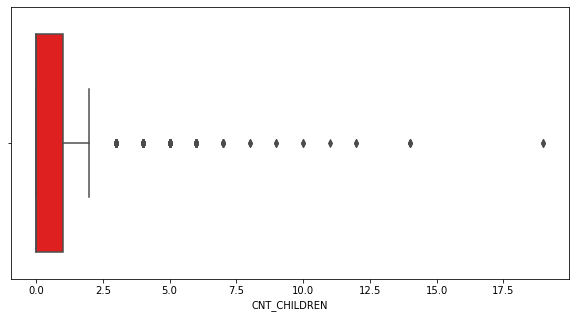

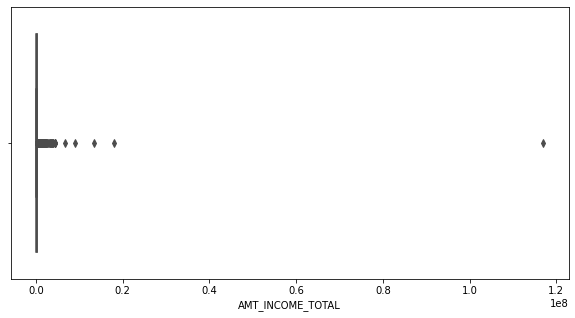

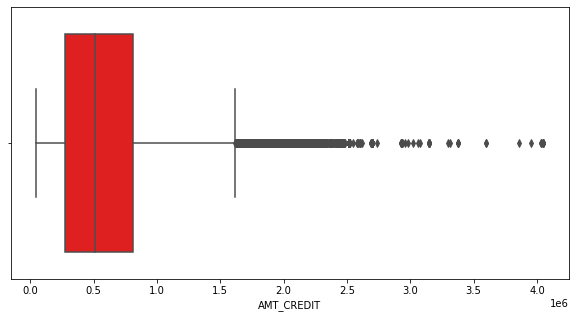

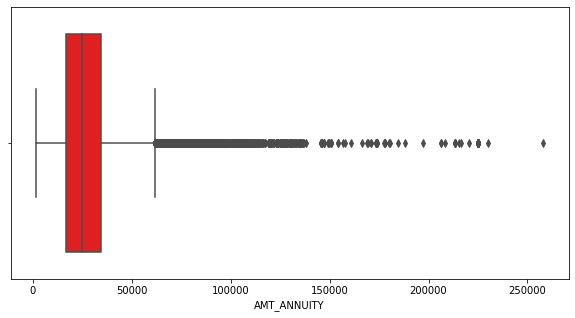

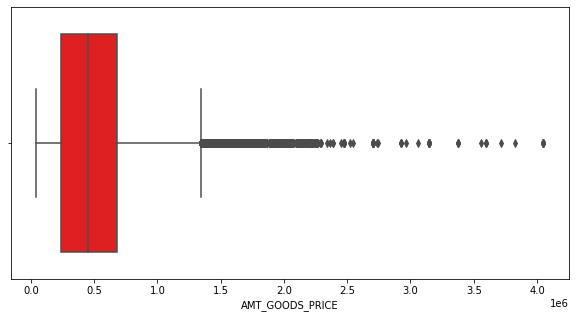

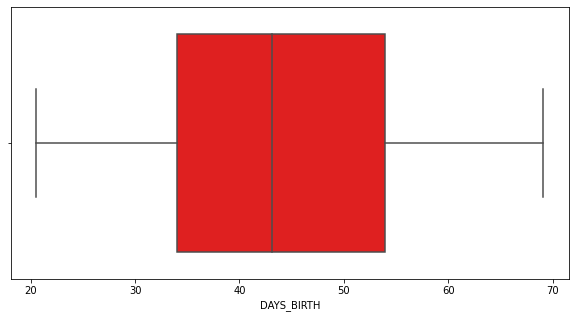

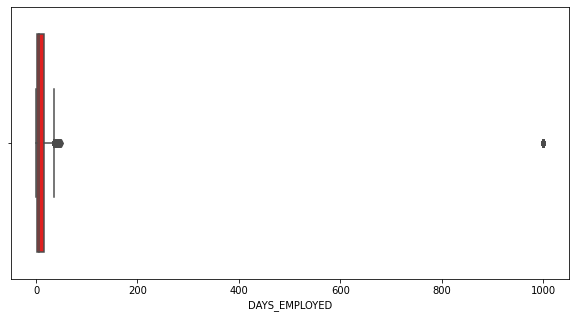

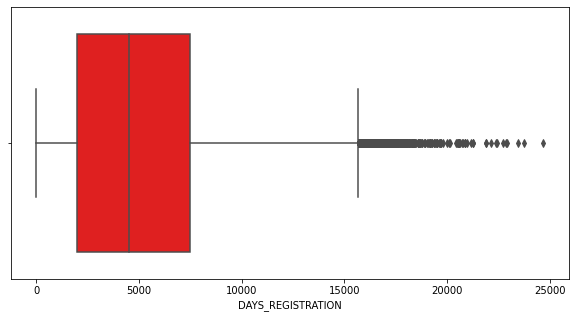

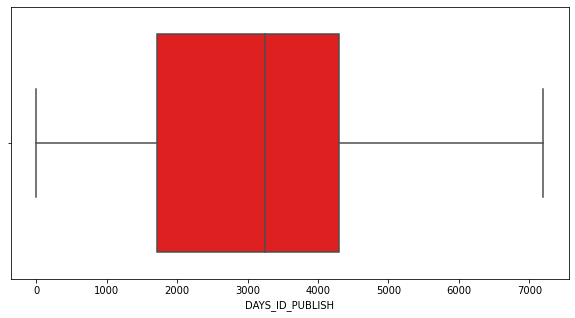

In [42]:
outliers=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]
for i in outliers:
    plt.figure(figsize=(10,5))
    sns.boxplot(df_application[i],color='r',orient='h')
    plt.show()

### Insight 
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
- AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
- DAYS_BIRTH has no outliers which means the data available is reliable.
- DAYS_EMPLOYED has outlier value are high impossible and hence this has to be incorrect entry.

## Checking Imbalaced

In [43]:
(df_application['TARGET']==1).sum()

24825

In [44]:
(df_application['TARGET']==0).sum()

282686

### Ratio

In [45]:
ratio=(df_application['TARGET']==0).sum()/(df_application['TARGET']==1).sum()

In [46]:
print(ratio)

11.387150050352467


- There is a large imbalance between the proportion of default (TARGET = 1) and non-default (TARGET = 0) in the dataset. The ratio of non-deafult to default is 11.3. Even if the default ratio is low, default of any application is costly and should be analyzed closely.


#### Ratio is 11.387150050352467

In [47]:
df_application['TARGET_CATEGORY'] = df_application['TARGET'].apply(lambda x: 'Defaulter' if x == 1 else 'Non Defaulter')
df_application.TARGET_CATEGORY.value_counts(normalize=True)*100

Non Defaulter   91.92712
Defaulter        8.07288
Name: TARGET_CATEGORY, dtype: float64

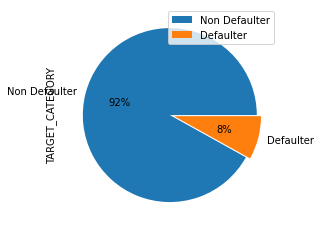

In [48]:
plt.figure(figsize=(5,4))
df_application.TARGET_CATEGORY.value_counts(normalize=True).plot.pie(autopct='%1.0f%%',legend=True,explode=(0,0.05))
plt.show()

- Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.


# Univariate Analysis 

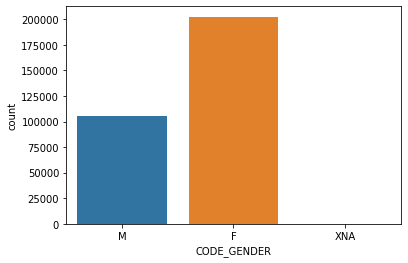

In [49]:
# (df_application.CODE_GENDER.value_counts(normalize=True)*100).plot.bar()
sns.countplot((df_application.CODE_GENDER))
plt.show()

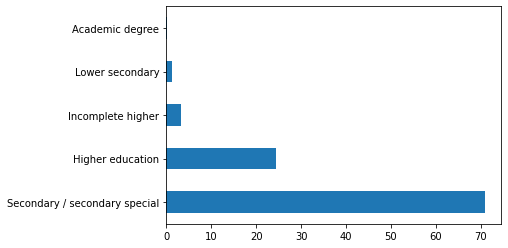

In [50]:
(df_application.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.show()

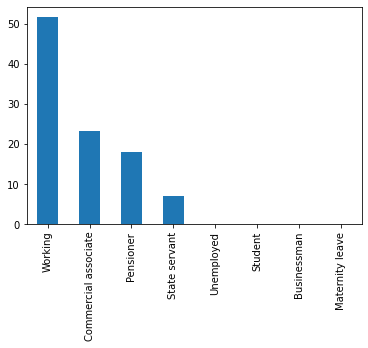

In [51]:
(df_application.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.show()

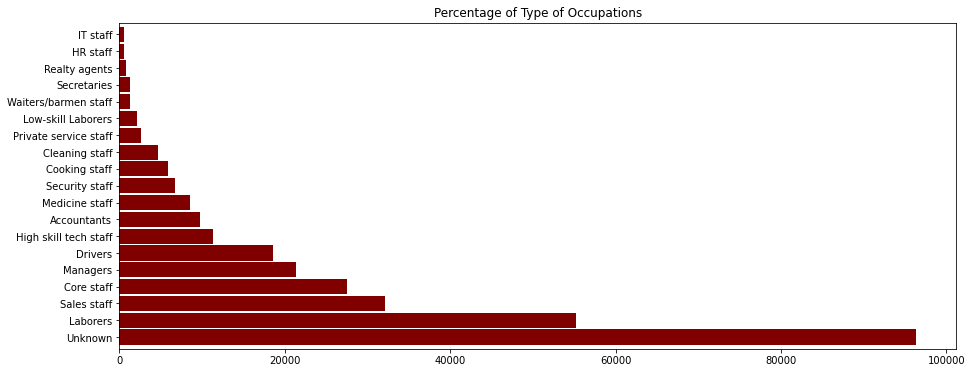

In [52]:
plt.figure(figsize = [15,6])
(df_application["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "maroon",width = .9)
plt.title("Percentage of Type of Occupations")
plt.show()

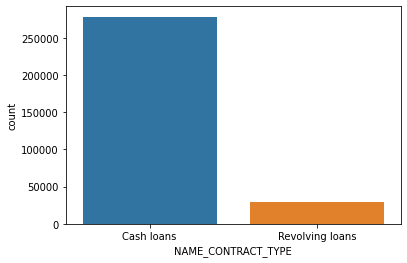

In [53]:
sns.countplot(df_application.NAME_CONTRACT_TYPE)
plt.show()

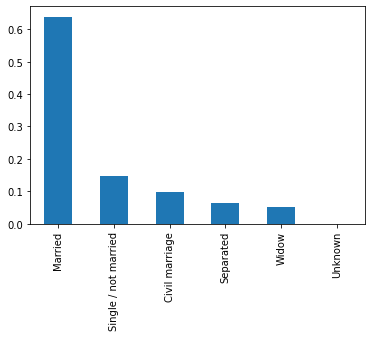

In [54]:
df_application.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

### Insight
- number of female is higher than male in application dataset
- number of secondary education is higher than other
- number of working profesion is higher than other 
- number of laborer are highest than other 
- Number of Cash loans are higher than Revolving loans. 
- Number of Married is highest in application dataset

# Univariate Segmented analysis

## splitting the into two dataframe

In [55]:
df_target1=df_application[df_application.TARGET==1]
df_target0=df_application[df_application.TARGET==0]

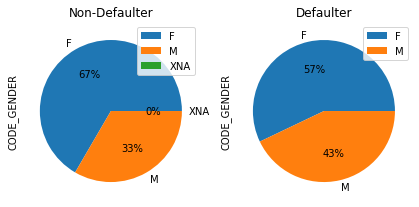

In [56]:
plt.figure(figsize=(7,6))
plt.subplot(1,2,1)
df_target0.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.0f%%',legend=True)
plt.title("Non-Defaulter")
plt.subplot(1,2,2)
df_target1.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.0f%%',legend=True)
plt.title("Defaulter")
plt.show()

- Number of Female clients are more in both the cases default/non-default. And the proportion of default is lower among female applicants than that of the male.

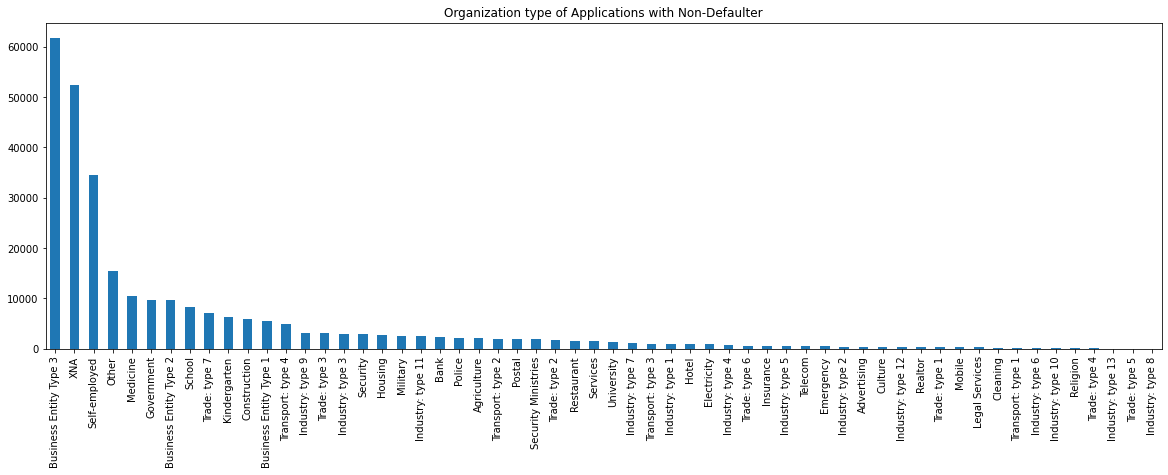

In [57]:
plt.figure(figsize=(20,6))
plt.title("Organization type of Applications with Non-Defaulter")
df_target0.ORGANIZATION_TYPE.value_counts().plot(kind='bar')
plt.show()

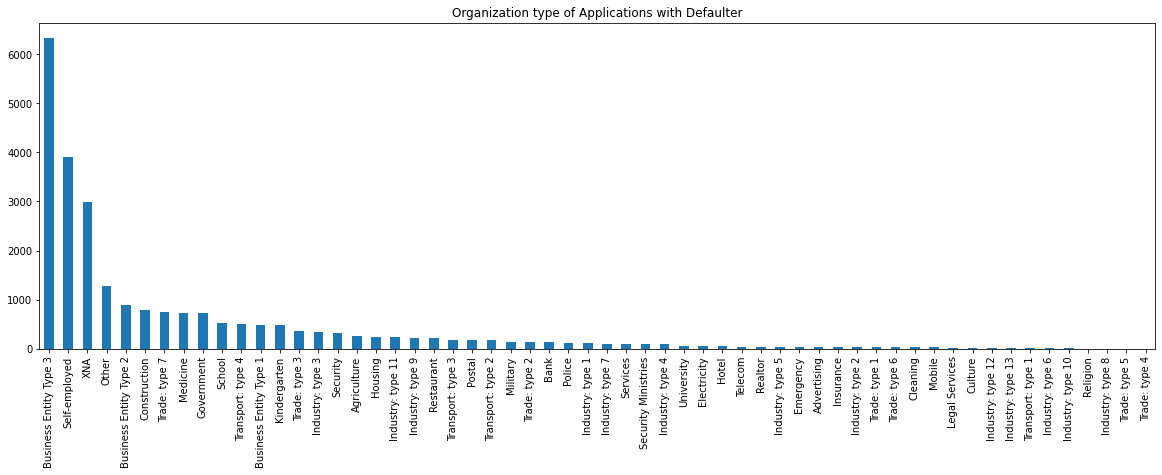

In [58]:
plt.figure(figsize=(20,6))
plt.title("Organization type of Applications with Defaulter")
df_target1.ORGANIZATION_TYPE.value_counts().plot(kind='bar')
plt.show()

- Majority of the applicants are from Business entity type 3   is highest both defaulter and Non defaulter .

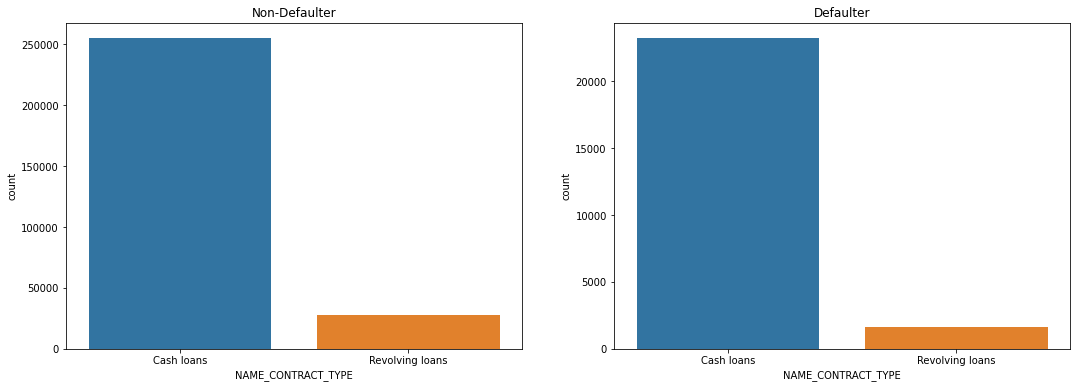

In [59]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(df_target0.NAME_CONTRACT_TYPE)
plt.title("Non-Defaulter")
plt.subplot(1,2,2)
sns.countplot(df_target1.NAME_CONTRACT_TYPE)
plt.title("Defaulter")
plt.show()

- Number of Cash loans are higher in both default/ non-default cases than Revolving loans. The proportion of default is higher in cash loan category compared to the revolving loans

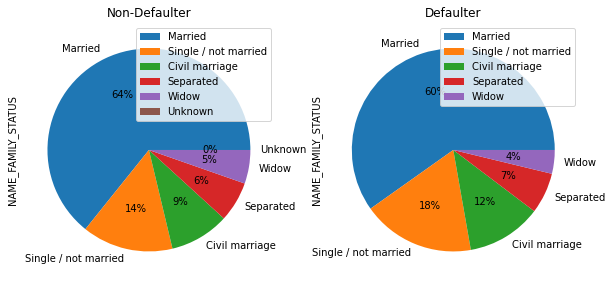

In [60]:
# Family Status of loan applicants
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulter")
df_target0.NAME_FAMILY_STATUS.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.subplot(1,2,2)
plt.title("Defaulter")
df_target1.NAME_FAMILY_STATUS.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.show()


- Applicants who are married are among the highest number of defaulters and non-defaulters. Whereas, widows are the lowest number of defaulters and non-defaulters. The proportion of default is the highest among the applicants who are in civil marriage category followed by applicants who are single.



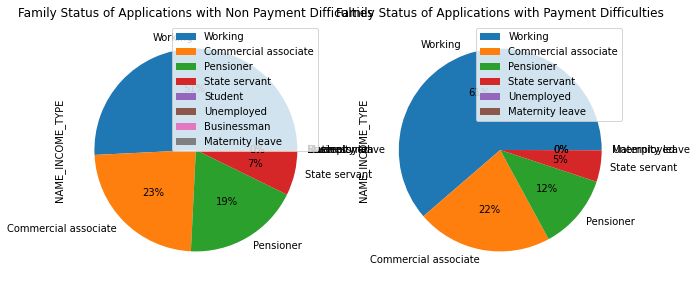

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Family Status of Applications with Non Payment Difficulties")
df_target0.NAME_INCOME_TYPE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.subplot(1,2,2)
plt.title("Family Status of Applications with Payment Difficulties")
df_target1.NAME_INCOME_TYPE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.show()


- Majority of the applicants are from working, commercial associate, pensioners and state servants. The remaining categories of income types are very small. The proportion of default is high among the working and the commercial associates. It is relatively lower for the pensioner and state servant.



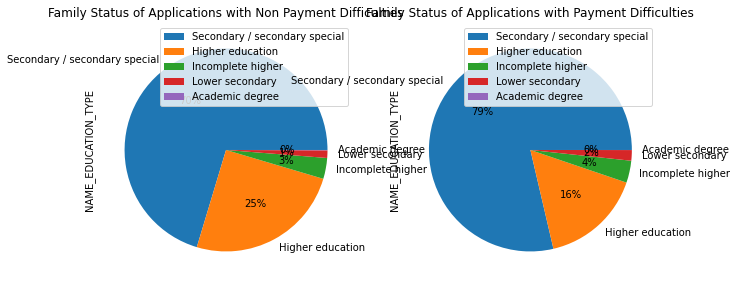

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Family Status of Applications with Non Payment Difficulties")
df_target0.NAME_EDUCATION_TYPE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.subplot(1,2,2)
plt.title("Family Status of Applications with Payment Difficulties")
df_target1.NAME_EDUCATION_TYPE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.show()

- Applicants with secondary and higher secondary education are among the highest defaulters as well as not defaulters. Whereas, applicants with academic degrees are the smallest group of applicants that have applied for the loan and applicants from this background has no recorded of default. From the above figure, we see that a distinct pattern emerges. The chances of default is lower as the education level of the applicants increases.



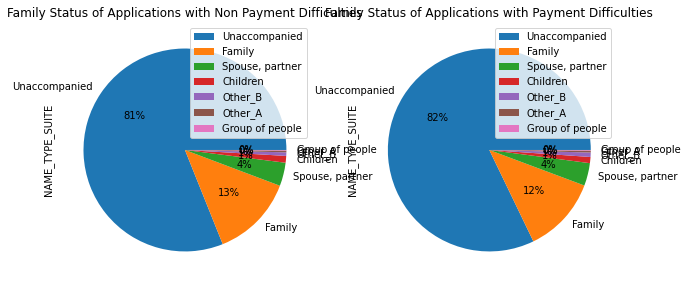

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Family Status of Applications with Non Payment Difficulties")
df_target0.NAME_TYPE_SUITE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.subplot(1,2,2)
plt.title("Family Status of Applications with Payment Difficulties")
df_target1.NAME_TYPE_SUITE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.show()

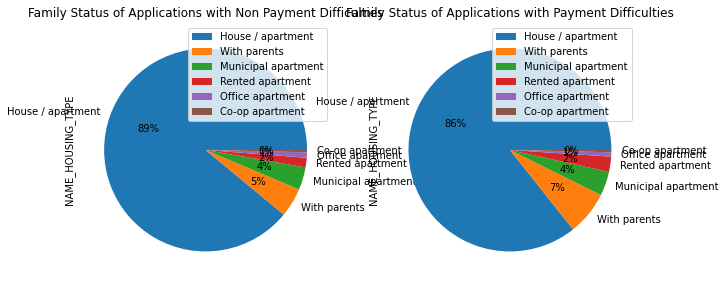

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Family Status of Applications with Non Payment Difficulties")
df_target0.NAME_HOUSING_TYPE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.subplot(1,2,2)
plt.title("Family Status of Applications with Payment Difficulties")
df_target1.NAME_HOUSING_TYPE.value_counts().plot(kind='pie',autopct='%1.0f%%',legend=True)
plt.show()

- Applicants with House /apartment is higher than other 

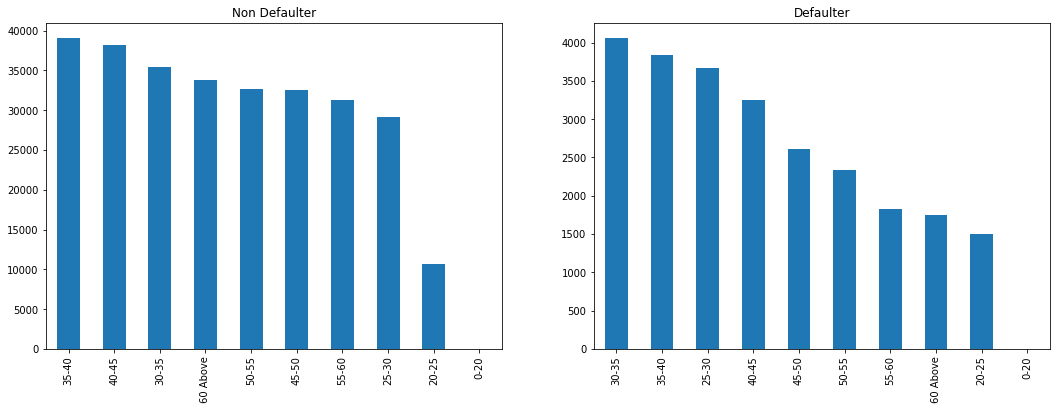

In [65]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Non Defaulter")
df_target0.AGE_GROUP.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Defaulter")
df_target1.AGE_GROUP.value_counts().plot(kind='bar')
plt.show()

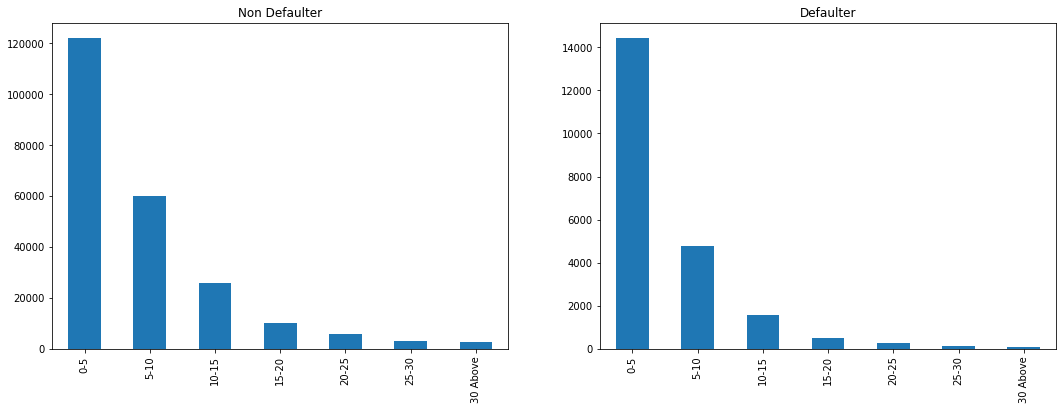

In [66]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Non Defaulter")
df_target0.EMPLOYEMENT_YEARS.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Defaulter")
df_target1.EMPLOYEMENT_YEARS.value_counts().plot(kind='bar')
plt.show()

###  Univariate continuous variable analysis

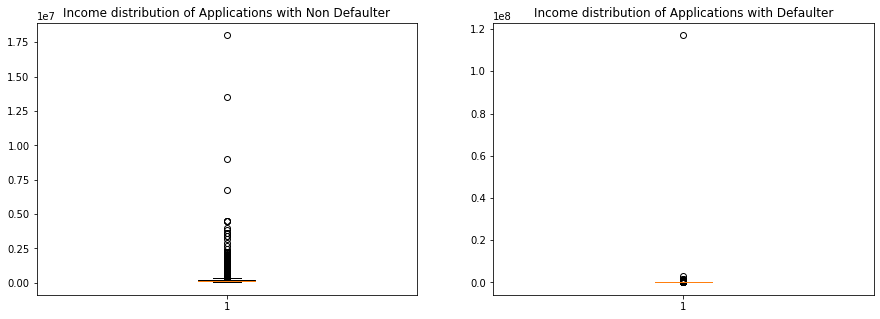

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Income distribution of Applications with Non Defaulter")
plt.boxplot(df_target0.AMT_INCOME_TOTAL)
plt.subplot(1,2,2)
plt.title("Income distribution of Applications with Defaulter")
plt.boxplot(df_target1.AMT_INCOME_TOTAL)
plt.show()

In [68]:
df_target0.AMT_INCOME_TOTAL.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99,1])

0.10000      81000.00000
0.25000     112500.00000
0.50000     148500.00000
0.75000     202500.00000
0.90000     270000.00000
0.95000     337500.00000
0.99000     486000.00000
1.00000   18000090.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
df_target1.AMT_INCOME_TOTAL.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99,1])

0.10000       81000.00000
0.25000      112500.00000
0.50000      135000.00000
0.75000      202500.00000
0.90000      256500.00000
0.95000      315000.00000
0.99000      450000.00000
1.00000   117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

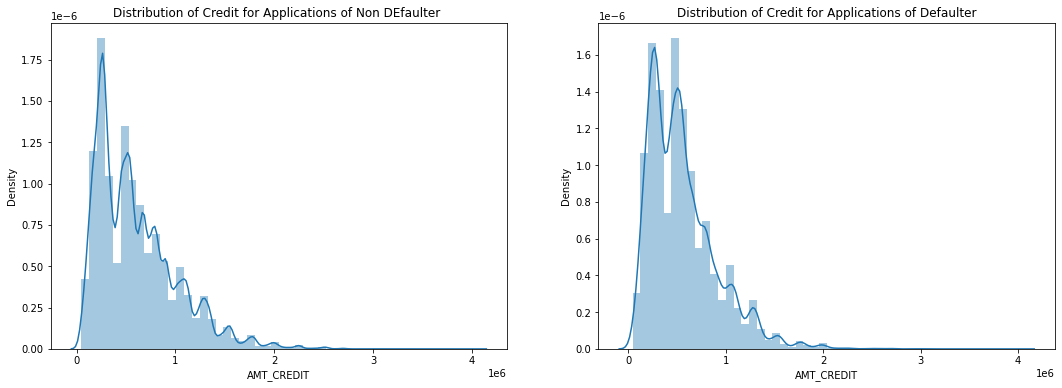

In [70]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Distribution of Credit for Applications of Non DEfaulter ")
sns.distplot(df_target0.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title("Distribution of Credit for Applications of Defaulter")
sns.distplot(df_target1.AMT_CREDIT)
plt.show()


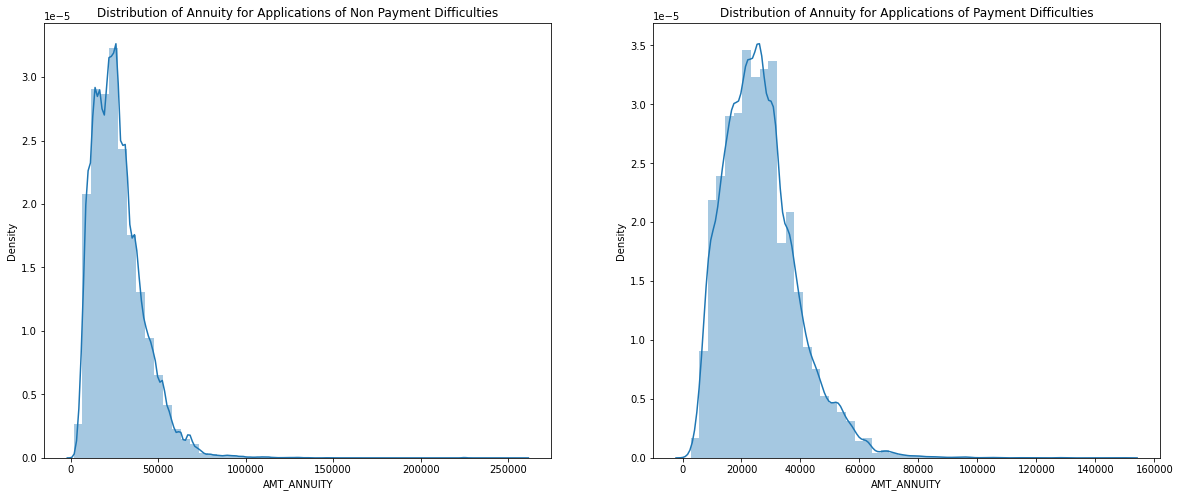

In [71]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Distribution of Annuity for Applications of Non Payment Difficulties")
sns.distplot(df_target0.AMT_ANNUITY)
plt.subplot(1,2,2)
plt.title("Distribution of Annuity for Applications of Payment Difficulties")
sns.distplot(df_target1.AMT_ANNUITY)
plt.show()

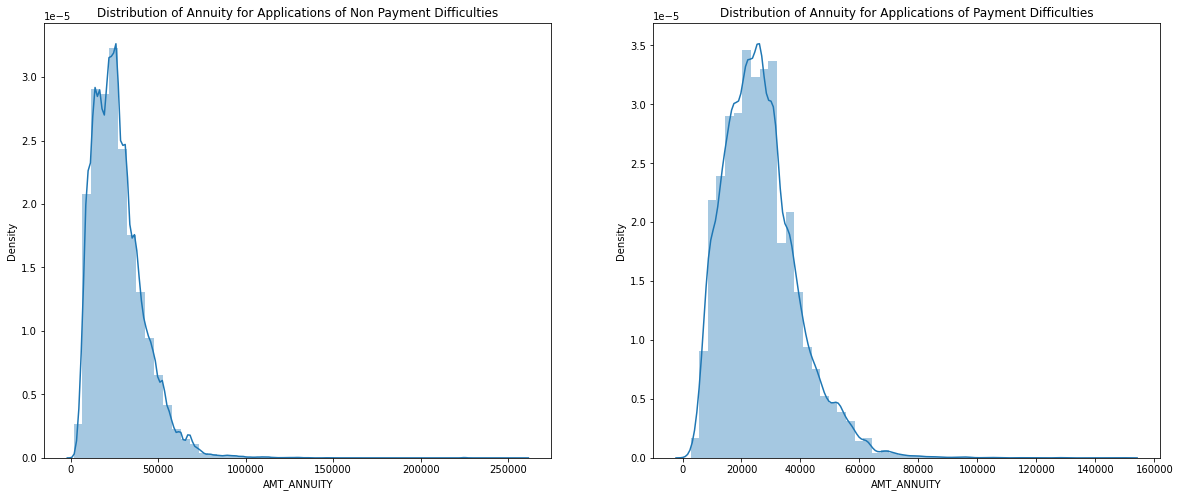

In [72]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Distribution of Annuity for Applications of Non Payment Difficulties")
sns.distplot(df_target0.AMT_ANNUITY)
plt.subplot(1,2,2)
plt.title("Distribution of Annuity for Applications of Payment Difficulties")
sns.distplot(df_target1.AMT_ANNUITY)
plt.show()

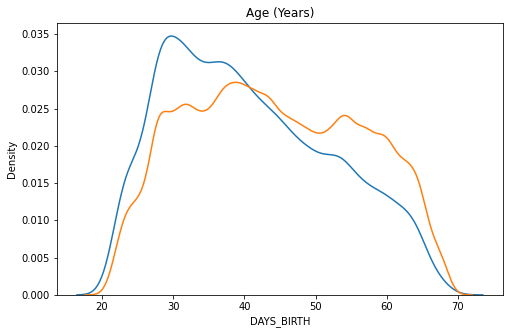

In [73]:
plt.figure(figsize = (8,5))
sns.kdeplot(df_target1['DAYS_BIRTH'], label = 'default')
sns.kdeplot(df_target0['DAYS_BIRTH'], label = 'non-default')
plt.title(r'Age (Years)')
plt.show()

- - Around 29 years to 40 years people are more defaulters. There is high chance to be defaulted of the young people. Non-defaulted people are almost equally distributed.

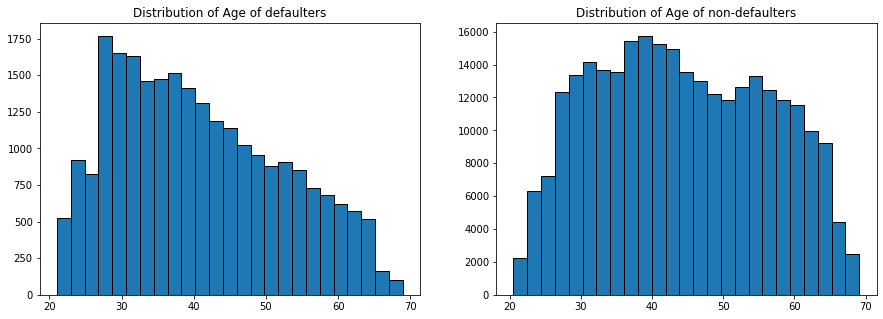

In [74]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df_target1['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of defaulters')
plt.subplot(1,2,2)
plt.hist(df_target0['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of non-defaulters')

plt.show()


# correlation 

## Correlation for Non Defaulter 

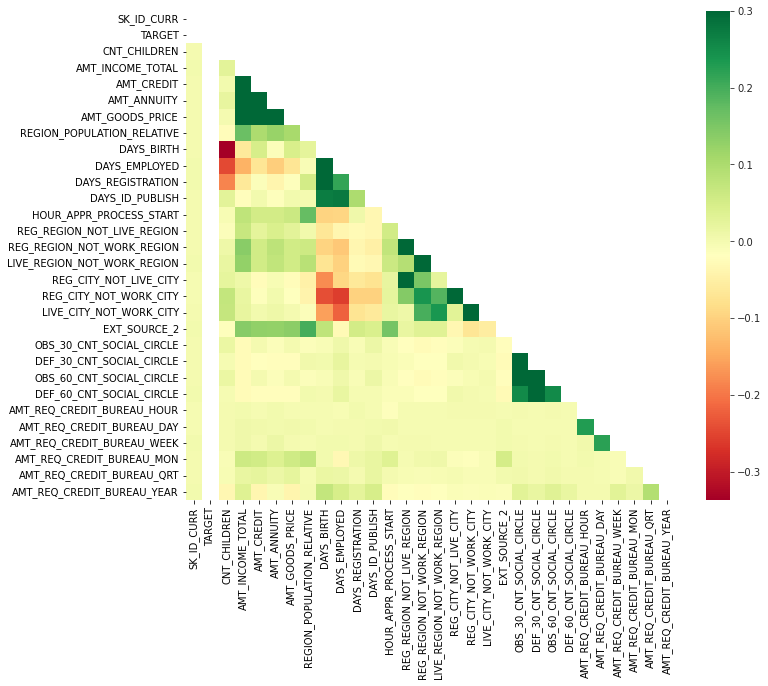

In [75]:
corr = df_target0.corr()
y= np.zeros_like(corr)
y[np.triu_indices_from(y)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=y, vmax=.3, square=True,cmap='RdYlGn')

###  Getting  top 10 correlation for the Non Defaulter  dataframe

In [76]:
corr_repayer = df_target0.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
680,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.99851
184,AMT_GOODS_PRICE,AMT_CREDIT,0.98725
464,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86186
711,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.85933
557,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83038
185,AMT_GOODS_PRICE,AMT_ANNUITY,0.77669
154,AMT_ANNUITY,AMT_CREDIT,0.77131
278,DAYS_EMPLOYED,DAYS_BIRTH,0.62611
433,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.44610
526,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.43551


## correlation Defaulter 

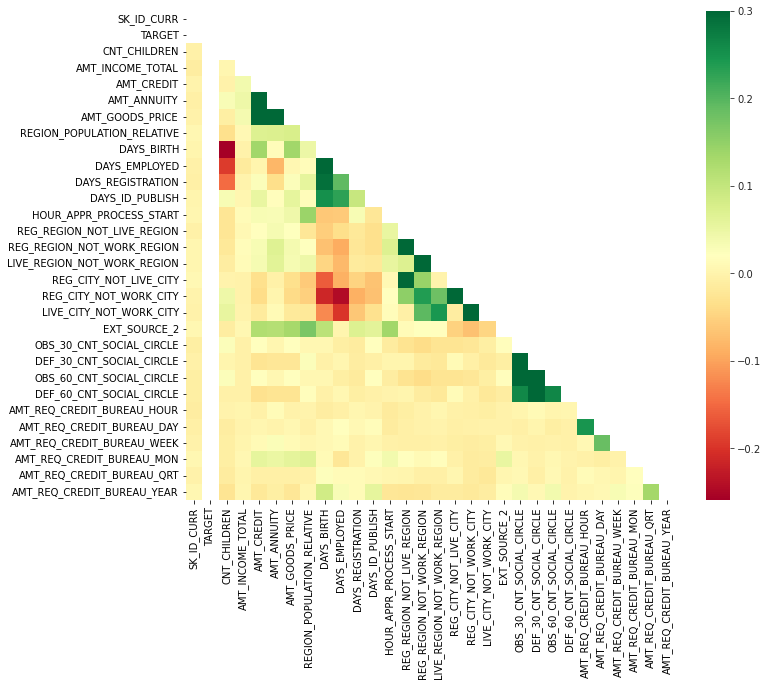

In [77]:
corr = df_target1.corr()
x = np.zeros_like(corr)
x[np.triu_indices_from(x)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=x, vmax=.3, square=True,cmap='RdYlGn')

####  top 10 correlation Defaulter 

In [78]:
corr_repayer = df_target1.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
680,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.99827
184,AMT_GOODS_PRICE,AMT_CREDIT,0.98310
711,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86899
464,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.84789
557,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.77854
185,AMT_GOODS_PRICE,AMT_ANNUITY,0.75270
154,AMT_ANNUITY,AMT_CREDIT,0.75219
278,DAYS_EMPLOYED,DAYS_BIRTH,0.58219
433,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.49794
526,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47205


#### Credit amount is highly correlated with:

- Goods Price Amount
- Loan Annuity
- Total Income

# Biavariate Analysis 

## Continuous- Continuous

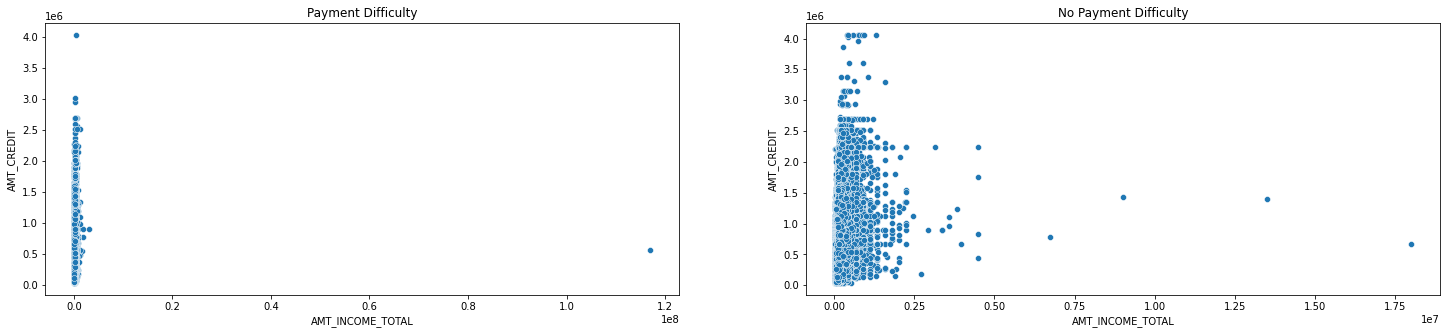

In [79]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title('Payment Difficulty')
sns.scatterplot(data=df_target1,x="AMT_INCOME_TOTAL",y="AMT_CREDIT")

plt.subplot(1,2,2)
plt.title('No Payment Difficulty')
sns.scatterplot(data=df_target0,x="AMT_INCOME_TOTAL",y="AMT_CREDIT")
plt.show()

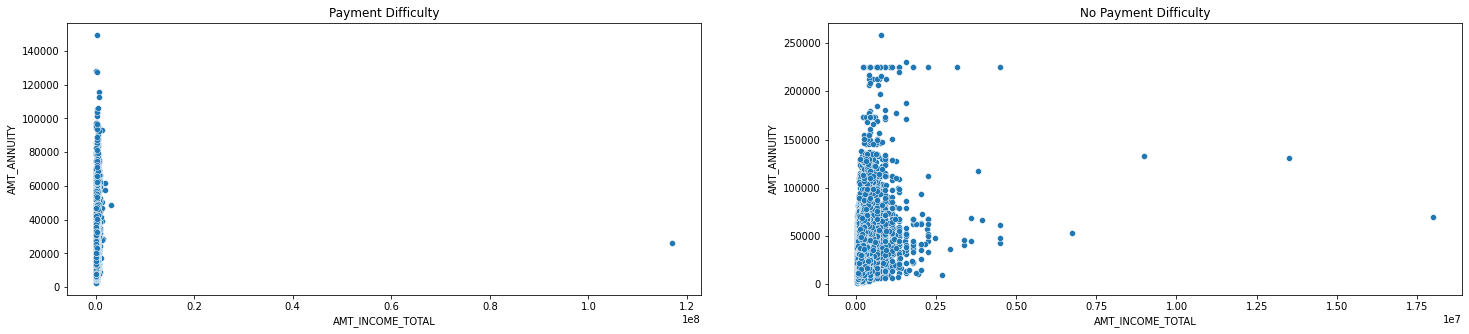

In [80]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title('Payment Difficulty')
sns.scatterplot(data=df_target1,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY")

plt.subplot(1,2,2)
plt.title('No Payment Difficulty')
sns.scatterplot(data=df_target0,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY")
plt.show()

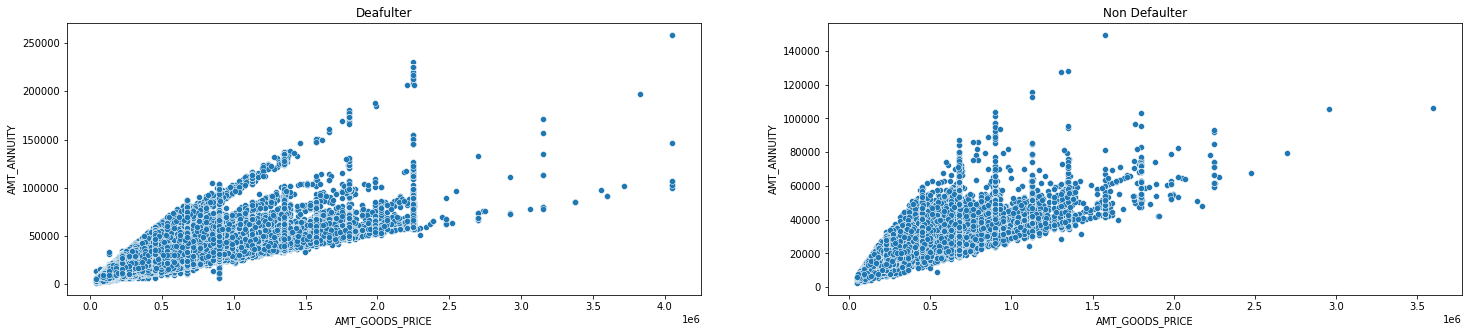

In [81]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title('Deafulter')
sns.scatterplot(data=df_target0,x="AMT_GOODS_PRICE",y="AMT_ANNUITY")

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.scatterplot(data=df_target1,x="AMT_GOODS_PRICE",y="AMT_ANNUITY")
plt.show()

### Continous vs Categorical plot

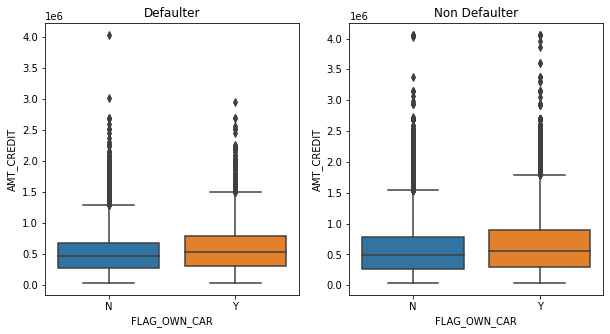

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(df_target1.FLAG_OWN_CAR,df_target1.AMT_CREDIT)


plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.boxplot(df_target0.FLAG_OWN_CAR,df_target0.AMT_CREDIT)
plt.show()

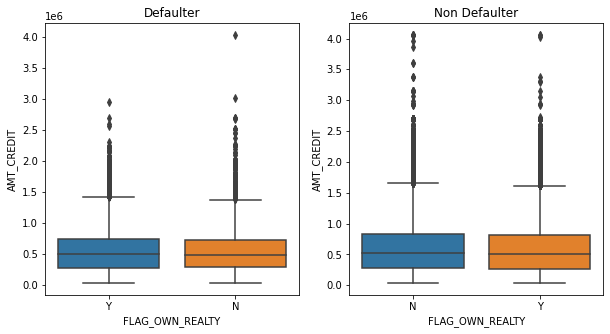

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(df_target1.FLAG_OWN_REALTY,df_target1.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.boxplot(df_target0.FLAG_OWN_REALTY,df_target0.AMT_CREDIT)
plt.show()

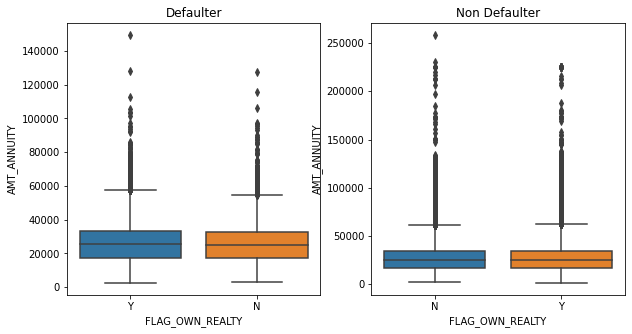

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(df_target1.FLAG_OWN_REALTY,df_target1.AMT_ANNUITY)



plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.boxplot(df_target0.FLAG_OWN_REALTY,df_target0.AMT_ANNUITY)
plt.show()

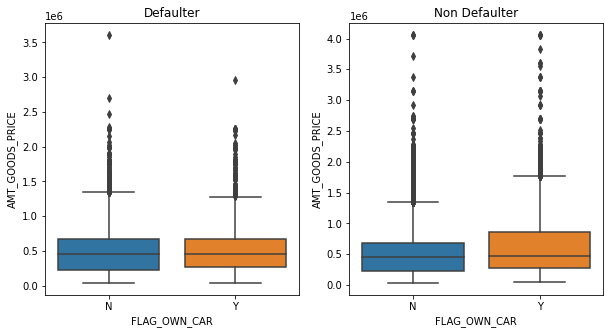

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(df_target1.FLAG_OWN_CAR,df_target1.AMT_GOODS_PRICE)


plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.boxplot(df_target0.FLAG_OWN_CAR,df_target0.AMT_GOODS_PRICE)
plt.show()



## categorical-categorical  columns

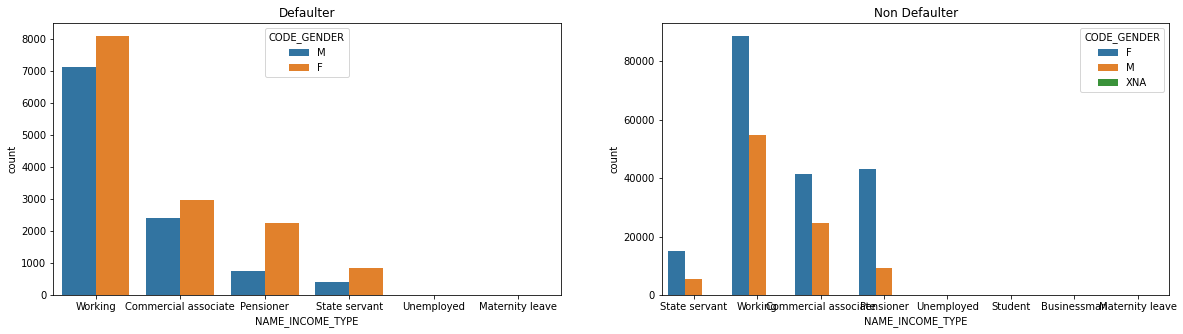

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=df_target1)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=df_target0)
plt.show()

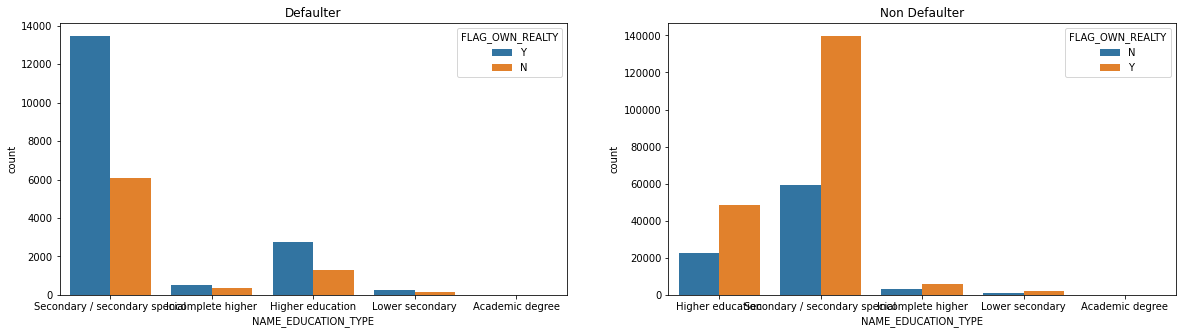

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='NAME_EDUCATION_TYPE',hue='FLAG_OWN_REALTY',data=df_target1)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.countplot(x='NAME_EDUCATION_TYPE',hue='FLAG_OWN_REALTY',data=df_target0)
plt.show()

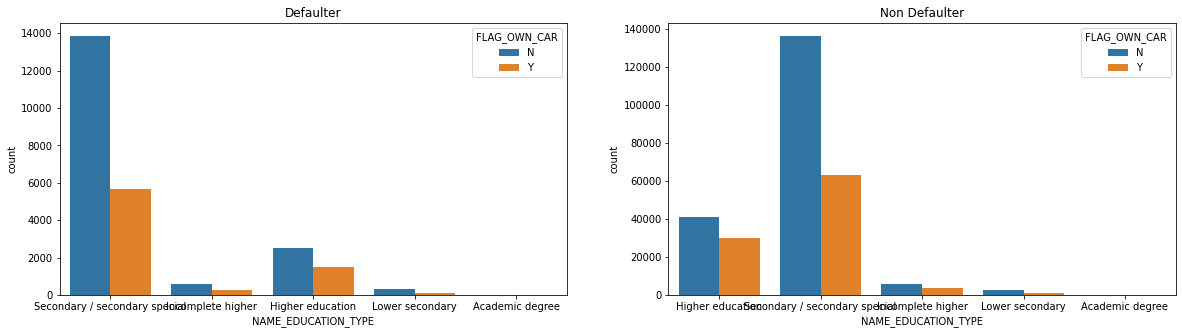

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='NAME_EDUCATION_TYPE',hue='FLAG_OWN_CAR',data=df_target1)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.countplot(x='NAME_EDUCATION_TYPE',hue='FLAG_OWN_CAR',data=df_target0)
plt.show()

- Cash loans are more credited.
- Those who are female and own car they got little more number of loans
- State servent got more number of loans
- Higher education got more loans
- Married people got more number of loans
- Clients who are living in municipal apartment, got more number of loans
- High income group people got more loans.

###  Categorical vs Continous  Variables

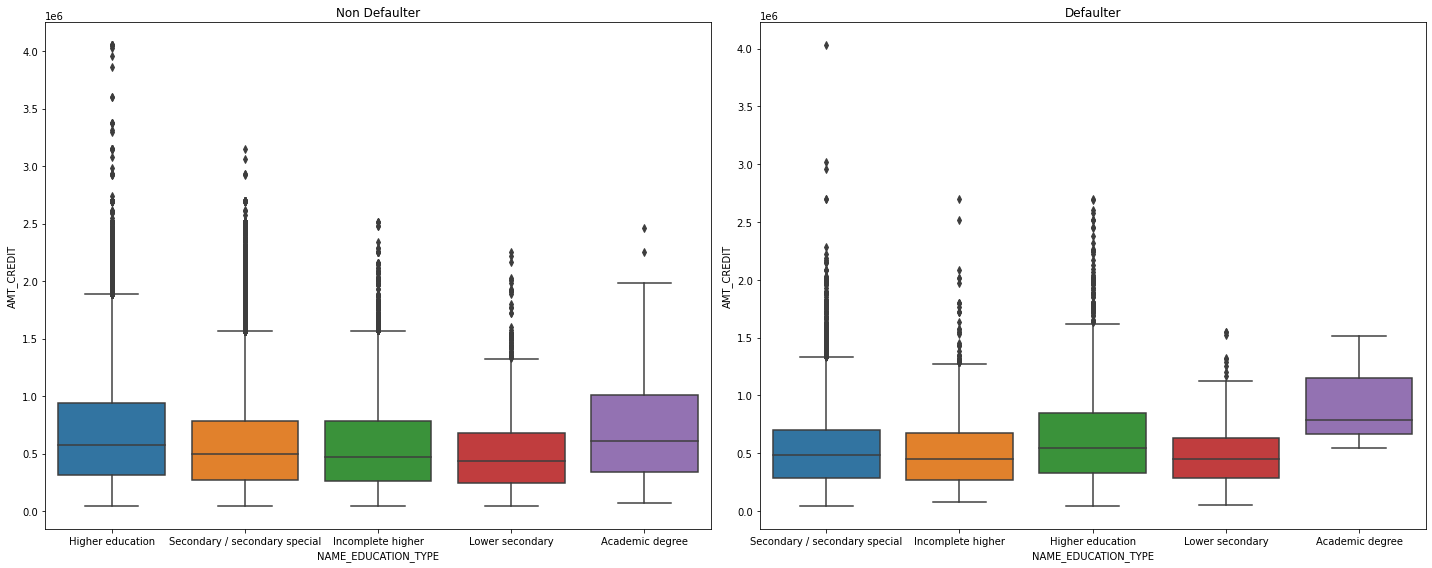

In [89]:

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df_target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Non Defaulter')
plt.subplot(1,2,2)
sns.boxplot(data=df_target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Defaulter')
plt.tight_layout()
plt.show()


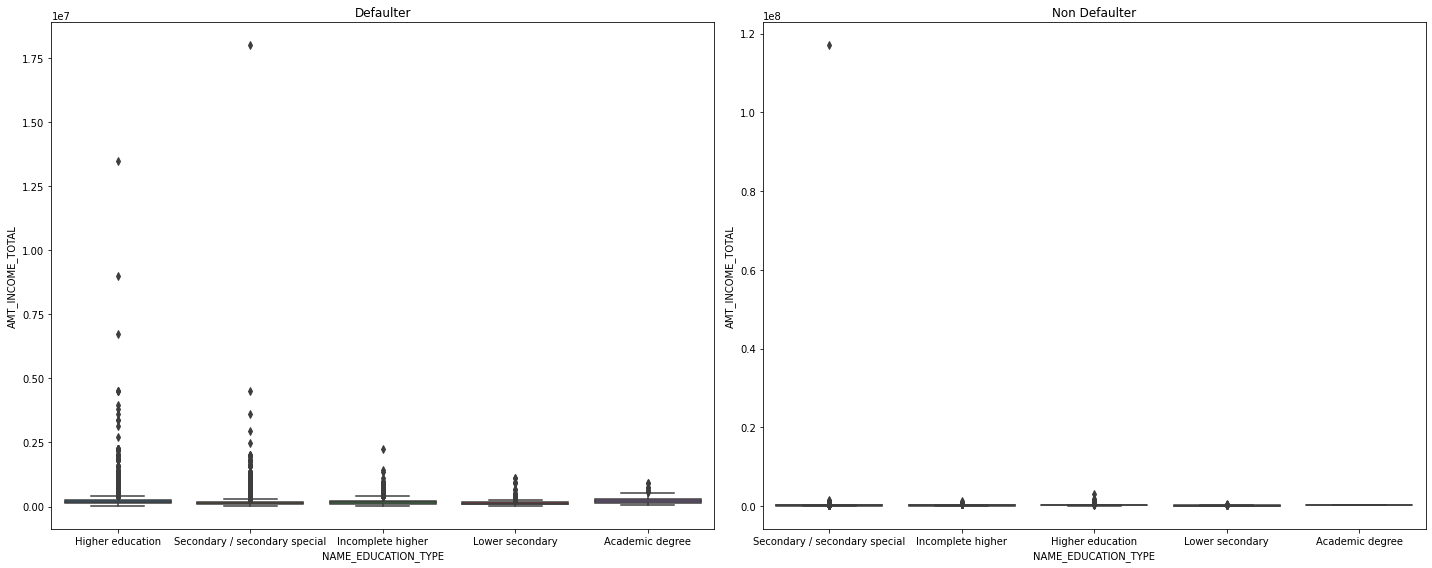

In [90]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df_target0,y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Defaulter')
plt.subplot(1,2,2)
sns.boxplot(data=df_target1,y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Non Defaulter')
plt.tight_layout()
plt.show()

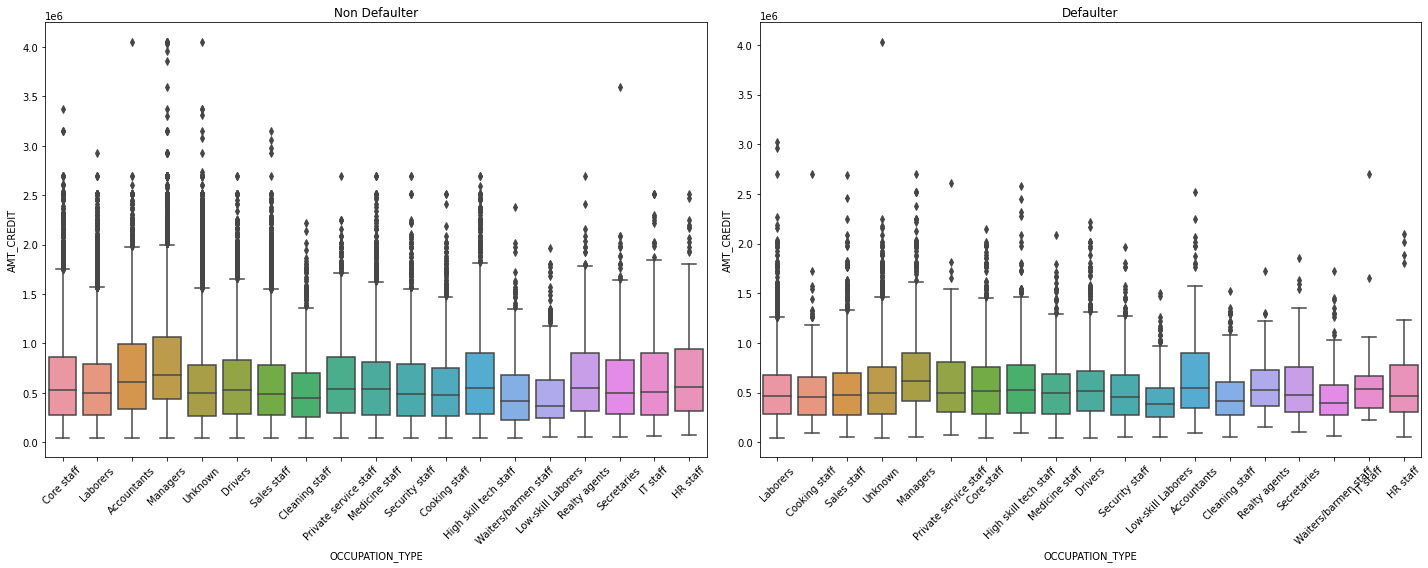

In [91]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df_target0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xticks(rotation=45)
plt.title('Non Defaulter')
plt.subplot(1,2,2)
sns.boxplot(data=df_target1,y='AMT_CREDIT',x='OCCUPATION_TYPE',)
plt.title('Defaulter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dataset 2 - "previous_application.csv"

In [92]:
df_previousdata=pd.read_csv("previous_application.csv")
df_previousdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [93]:
df_previousdata.shape

(1670214, 37)

In [94]:
df_previousdata.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

There are 37 columns having various data types like object, int, float and 1670214 rows.

In [95]:
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MO

In [96]:
df_previousdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00000,1670214.00000,1297979.00000,1670214.00000,1670213.00000,774370.00000,1284699.00000,1670214.00000,1670214.00000,774370.00000,5951.00000,5951.00000,1670214.00000,1670214.00000,1297984.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000
mean,1923089.13533,278357.17410,15955.12066,175233.86036,196114.02122,6697.40214,227847.27928,12.48418,0.99647,0.07964,0.18836,0.77350,-880.67967,313.95112,16.05408,342209.85504,13826.26934,33767.77405,76582.40306,81992.34384,0.33257
std,532597.95870,102814.82385,14782.13733,292779.76239,318574.61655,20921.49541,315396.55794,3.33403,0.05933,0.10782,0.08767,0.10088,779.09967,7127.44346,14.56729,88916.11583,72444.86971,106857.03479,149647.41512,153303.51673,0.47113
min,1000001.00000,100001.00000,0.00000,0.00000,0.00000,-0.90000,0.00000,0.00000,0.00000,-0.00001,0.03478,0.37315,-2922.00000,-1.00000,0.00000,-2922.00000,-2892.00000,-2801.00000,-2889.00000,-2874.00000,0.00000
25%,1461857.25000,189329.00000,6321.78000,18720.00000,24160.50000,0.00000,50841.00000,10.00000,1.00000,0.00000,0.16072,0.71564,-1300.00000,-1.00000,6.00000,365243.00000,-1628.00000,-1242.00000,-1314.00000,-1270.00000,0.00000
50%,1923110.50000,278714.50000,11250.00000,71046.00000,80541.00000,1638.00000,112320.00000,12.00000,1.00000,0.05161,0.18912,0.83510,-581.00000,3.00000,12.00000,365243.00000,-831.00000,-361.00000,-537.00000,-499.00000,0.00000
75%,2384279.75000,367514.00000,20658.42000,180360.00000,216418.50000,7740.00000,234000.00000,15.00000,1.00000,0.10891,0.19333,0.85254,-280.00000,82.00000,24.00000,365243.00000,-411.00000,129.00000,-74.00000,-44.00000,1.00000
max,2845382.00000,456255.00000,418058.14500,6905160.00000,6905160.00000,3060045.00000,6905160.00000,23.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,4000000.00000,84.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000,1.00000


In [97]:
(df_previousdata.isnull().sum()*100/len(df_previousdata)).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED      99.64370
RATE_INTEREST_PRIMARY         99.64370
RATE_DOWN_PAYMENT             53.63648
AMT_DOWN_PAYMENT              53.63648
NAME_TYPE_SUITE               49.11975
DAYS_TERMINATION              40.29813
NFLAG_INSURED_ON_APPROVAL     40.29813
DAYS_FIRST_DRAWING            40.29813
DAYS_FIRST_DUE                40.29813
DAYS_LAST_DUE_1ST_VERSION     40.29813
DAYS_LAST_DUE                 40.29813
AMT_GOODS_PRICE               23.08177
AMT_ANNUITY                   22.28667
CNT_PAYMENT                   22.28637
PRODUCT_COMBINATION            0.02072
AMT_CREDIT                     0.00006
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
AMT_APPLICATION                0.00000
NAME_PAYMENT_TYPE              0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS     

In [98]:
def Nullvalue(df_previousdata):
    return round((df_previousdata.isnull().sum()*100/len(df_previousdata)).sort_values(ascending = False),2)

Nullvalue(df_previousdata).head(10)

RATE_INTEREST_PRIVILEGED    99.64000
RATE_INTEREST_PRIMARY       99.64000
RATE_DOWN_PAYMENT           53.64000
AMT_DOWN_PAYMENT            53.64000
NAME_TYPE_SUITE             49.12000
DAYS_TERMINATION            40.30000
NFLAG_INSURED_ON_APPROVAL   40.30000
DAYS_FIRST_DRAWING          40.30000
DAYS_FIRST_DUE              40.30000
DAYS_LAST_DUE_1ST_VERSION   40.30000
dtype: float64

In [99]:
Null_value50 = null_values(df_previousdata)[null_values(df_previousdata)>50]

In [100]:
Null_value50

RATE_INTEREST_PRIVILEGED   99.64000
RATE_INTEREST_PRIMARY      99.64000
RATE_DOWN_PAYMENT          53.64000
AMT_DOWN_PAYMENT           53.64000
dtype: float64

In [101]:
Null_value50.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
       'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT'],
      dtype='object')

In [102]:
df_previousdata.drop(Null_value50.index,axis=1,inplace=True)

In [103]:
null_values(df_previousdata).head(15)

NAME_TYPE_SUITE             49.12000
DAYS_FIRST_DUE              40.30000
DAYS_TERMINATION            40.30000
DAYS_FIRST_DRAWING          40.30000
NFLAG_INSURED_ON_APPROVAL   40.30000
DAYS_LAST_DUE_1ST_VERSION   40.30000
DAYS_LAST_DUE               40.30000
AMT_GOODS_PRICE             23.08000
AMT_ANNUITY                 22.29000
CNT_PAYMENT                 22.29000
PRODUCT_COMBINATION          0.02000
AMT_CREDIT                   0.00000
NAME_CASH_LOAN_PURPOSE       0.00000
SK_ID_CURR                   0.00000
NAME_CONTRACT_TYPE           0.00000
dtype: float64

In [104]:
df_previousdata['SK_ID_PREV'].value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [105]:
df_previousdata["NAME_TYPE_SUITE"] = df_previousdata["NAME_TYPE_SUITE"].fillna("Unknown")
df_previousdata["NAME_TYPE_SUITE"].isnull().sum()

0

In [106]:
Unwanted_col_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df_previousdata.drop(Unwanted_col_prev,axis =1, inplace = True)

df_previousdata.shape

(1670214, 29)

## Day columns

In [107]:
pre_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

df_previousdata[pre_days_col].describe() 


,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1670214.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000
mean,-880.67967,342209.85504,13826.26934,33767.77405,76582.40306,81992.34384
std,779.09967,88916.11583,72444.86971,106857.03479,149647.41512,153303.51673
min,-2922.00000,-2922.00000,-2892.00000,-2801.00000,-2889.00000,-2874.00000
25%,-1300.00000,365243.00000,-1628.00000,-1242.00000,-1314.00000,-1270.00000
50%,-581.00000,365243.00000,-831.00000,-361.00000,-537.00000,-499.00000
75%,-280.00000,365243.00000,-411.00000,129.00000,-74.00000,-44.00000
max,-1.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000


In [108]:
df_previousdata[pre_days_col] = abs(df_previousdata[pre_days_col])
df_previousdata[pre_days_col].describe()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1670214.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000
mean,880.67967,342340.05654,15949.22406,35163.36326,78152.73021,83505.77502
std,779.09967,88413.49522,72007.27088,106405.95019,148833.34247,152484.41880
min,1.00000,2.00000,2.00000,0.00000,2.00000,2.00000
25%,280.00000,365243.00000,475.00000,257.00000,455.00000,447.00000
50%,581.00000,365243.00000,921.00000,741.00000,1155.00000,1171.00000
75%,1300.00000,365243.00000,1825.00000,1735.00000,2418.00000,2501.00000
max,2922.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000


In [109]:
df_previousdata.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,17145.00000,XAP,Approved,73.00000,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,42.00000,300.00000,42.00000,37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,607500.00000,XNA,Approved,164.00000,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,112500.00000,XNA,Approved,301.00000,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,450000.00000,XNA,Approved,512.00000,Cash through the bank,XAP,Unknown,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,482.00000,152.00000,182.00000,177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,337500.00000,Repairs,Refused,781.00000,Cash through the bank,HC,Unknown,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
5,1383531,199383,Cash loans,23703.93000,315000.00000,340573.50000,315000.00000,Everyday expenses,Approved,684.00000,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.00000,low_normal,Cash X-Sell: low,365243.00000,654.00000,144.00000,144.00000,137.00000,1.00000
6,2315218,175704,Cash loans,nan,0.00000,0.00000,nan,XNA,Canceled,14.00000,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
7,1656711,296299,Cash loans,nan,0.00000,0.00000,nan,XNA,Canceled,21.00000,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
8,2367563,342292,Cash loans,nan,0.00000,0.00000,nan,XNA,Canceled,386.00000,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
9,2579447,334349,Cash loans,nan,0.00000,0.00000,nan,XNA,Canceled,57.00000,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan


In [110]:
df_previousdata=df_previousdata.replace('XNA', np.NaN)
df_previousdata=df_previousdata.replace('XAP', np.NaN)

In [111]:
df_previousdata.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,17145.00000,NaN,Approved,73.00000,Cash through the bank,NaN,Unknown,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,42.00000,300.00000,42.00000,37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,607500.00000,NaN,Approved,164.00000,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.00000,low_action,Cash X-Sell: low,365243.00000,134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,112500.00000,NaN,Approved,301.00000,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.00000,high,Cash X-Sell: high,365243.00000,271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,450000.00000,NaN,Approved,512.00000,Cash through the bank,NaN,Unknown,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.00000,middle,Cash X-Sell: middle,365243.00000,482.00000,152.00000,182.00000,177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,337500.00000,Repairs,Refused,781.00000,Cash through the bank,HC,Unknown,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
5,1383531,199383,Cash loans,23703.93000,315000.00000,340573.50000,315000.00000,Everyday expenses,Approved,684.00000,Cash through the bank,NaN,Family,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,18.00000,low_normal,Cash X-Sell: low,365243.00000,654.00000,144.00000,144.00000,137.00000,1.00000
6,2315218,175704,Cash loans,nan,0.00000,0.00000,nan,NaN,Canceled,14.00000,NaN,NaN,Unknown,Repeater,NaN,NaN,NaN,Credit and cash offices,-1,NaN,nan,NaN,Cash,nan,nan,nan,nan,nan,nan
7,1656711,296299,Cash loans,nan,0.00000,0.00000,nan,NaN,Canceled,21.00000,NaN,NaN,Unknown,Repeater,NaN,NaN,NaN,Credit and cash offices,-1,NaN,nan,NaN,Cash,nan,nan,nan,nan,nan,nan
8,2367563,342292,Cash loans,nan,0.00000,0.00000,nan,NaN,Canceled,386.00000,NaN,NaN,Unknown,Repeater,NaN,NaN,NaN,Credit and cash offices,-1,NaN,nan,NaN,Cash,nan,nan,nan,nan,nan,nan
9,2579447,334349,Cash loans,nan,0.00000,0.00000,nan,NaN,Canceled,57.00000,NaN,NaN,Unknown,Repeater,NaN,NaN,NaN,Credit and cash offices,-1,NaN,nan,NaN,Cash,nan,nan,nan,nan,nan,nan


In [112]:
df_previousdata['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved       62.07474
Canceled       18.93883
Refused        17.40364
Unused offer    1.58279
Name: NAME_CONTRACT_STATUS, dtype: float64

## Univariate Analysis on previous application

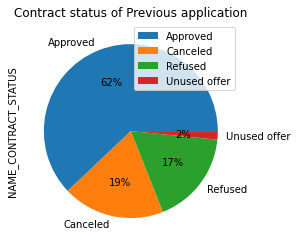

In [113]:
temp = df_previousdata["NAME_CONTRACT_STATUS"].value_counts()
temp.plot.pie(autopct='%1.0f%%',legend=True)
plt.title('Contract status of Previous application')
plt.show()

- Approved loan status is huge than rejected or canceled.

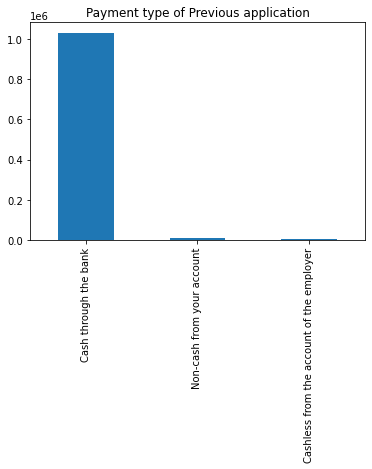

In [114]:
temp = df_previousdata["NAME_PAYMENT_TYPE"].value_counts()
temp.plot.bar()
plt.title('Payment type of Previous application')
plt.show()

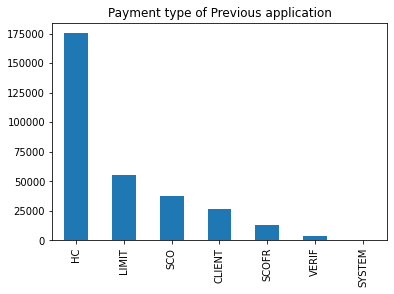

In [115]:
temp = df_previousdata["CODE_REJECT_REASON"].value_counts()
temp.plot.bar()
plt.title('Payment type of Previous application')
plt.show()

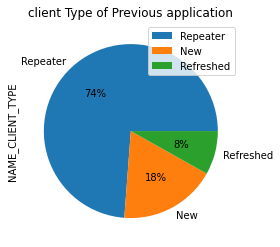

In [116]:
temp = df_previousdata["NAME_CLIENT_TYPE"].value_counts()
temp.plot.pie(autopct='%1.0f%%',legend=True)
plt.title('client Type of Previous application')
plt.show()

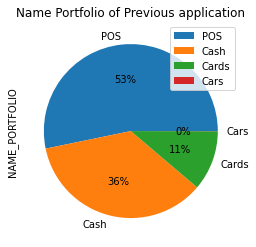

In [117]:
temp = df_previousdata["NAME_PORTFOLIO"].value_counts()
temp.plot.pie(autopct='%1.0f%%',legend=True)
plt.title('Name Portfolio of Previous application')
plt.show()

- POS loans are highest rather than cash loans.

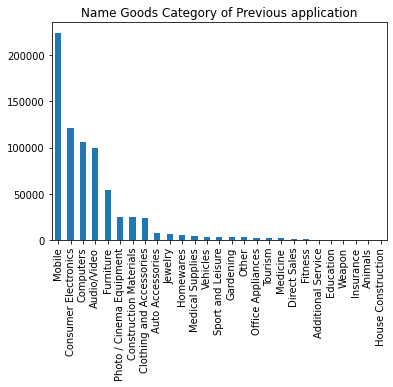

In [118]:
temp = df_previousdata["NAME_GOODS_CATEGORY"].value_counts()
temp.plot.bar()
plt.title('Name Goods Category of Previous application')
plt.show()

- In Name Good Category Mobile is highest than other

### Outliers previous application

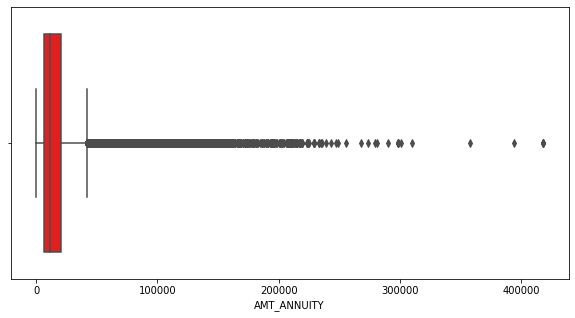

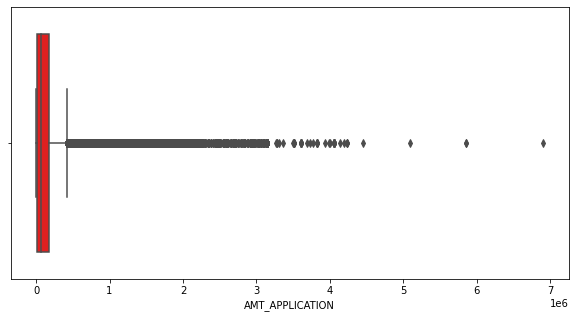

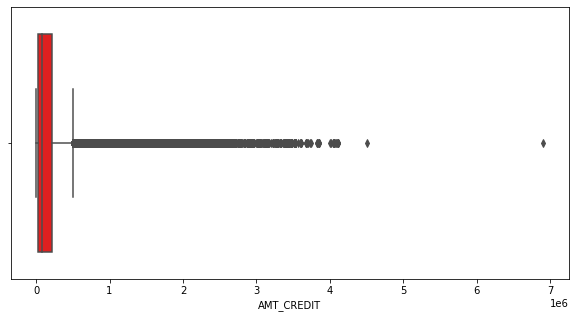

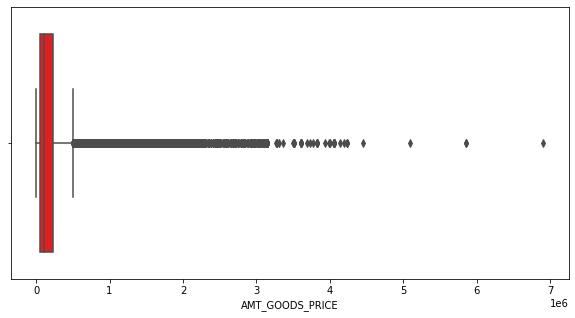

In [119]:
out=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]

# Creating function to Check Outliers

for i in out:
    plt.figure(figsize=(10,5))
    sns.boxplot(df_previousdata[i],orient='h',color="r")
    plt.show()

#### Insight 
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, have some number of outliers
- AMT_CREDIT has huge number of outliers which indicate that few of the loan applicants have high income when compared to the other

### Merging the file and analysis the data

In [120]:
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'DAYS_BIRTH','DAYS_EMPLOYED']
application_sub = df_application[cols]
application_sub.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED
0,100002,1,M,Secondary / secondary special,Single / not married,25.92055,1.74521
1,100003,0,F,Higher education,Married,45.93151,3.25479
2,100004,0,M,Secondary / secondary special,Single / not married,52.18082,0.61644
3,100006,0,F,Secondary / secondary special,Civil marriage,52.06849,8.32603
4,100007,0,M,Secondary / secondary special,Single / not married,54.60822,8.32329


In [121]:
merged_df=pd.merge(df_previousdata,application_sub,on='SK_ID_CURR',how='left')
merged_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,17145.00000,NaN,Approved,73.00000,Cash through the bank,NaN,Unknown,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,42.00000,300.00000,42.00000,37.00000,0.00000,0.00000,F,Incomplete higher,Married,39.56986,20.25205
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,607500.00000,NaN,Approved,164.00000,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.00000,low_action,Cash X-Sell: low,365243.00000,134.00000,916.00000,365243.00000,365243.00000,1.00000,0.00000,F,Secondary / secondary special,Civil marriage,58.45205,3.43836
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,112500.00000,NaN,Approved,301.00000,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.00000,high,Cash X-Sell: high,365243.00000,271.00000,59.00000,365243.00000,365243.00000,1.00000,0.00000,F,Secondary / secondary special,Married,28.87945,3.22466
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,450000.00000,NaN,Approved,512.00000,Cash through the bank,NaN,Unknown,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.00000,middle,Cash X-Sell: middle,365243.00000,482.00000,152.00000,182.00000,177.00000,1.00000,0.00000,M,Secondary / secondary special,Married,60.72055,1000.66575
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,337500.00000,Repairs,Refused,781.00000,Cash through the bank,HC,Unknown,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan,0.00000,F,Secondary / secondary special,Married,27.45205,6.86849


In [122]:
merged_df.shape

(1670214, 35)

In [123]:
merged_df.info("all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1669868 non-null  object 
 3   AMT_ANNUITY                1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     69635 non-null    object 
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  float64
 10  NAME_PAYMENT_TYPE          1042830 non-null  object 
 11  CODE_REJECT_REASON         311877 non-null   object 
 12  NAME_TYPE_SUITE            1670214 non-null  object 
 13  NAME_CLIENT_

### Bivariate Analysis 

In [124]:
df_merged1=merged_df[merged_df.TARGET==1]
df_merged0=merged_df[merged_df.TARGET==0]

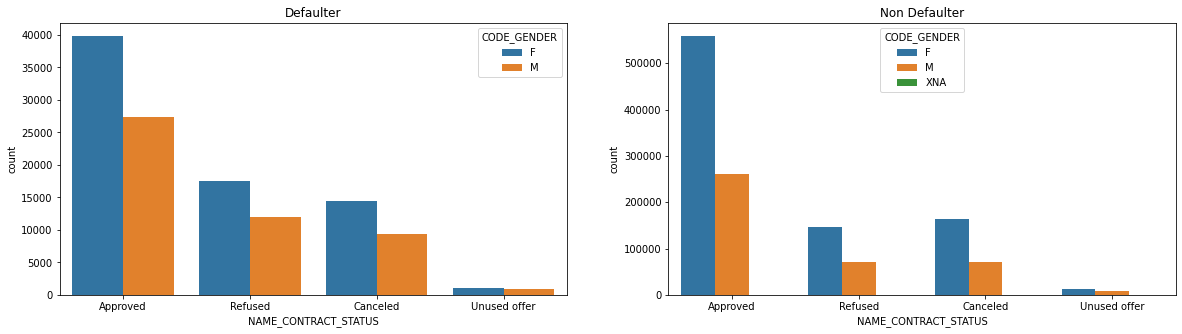

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=df_merged1)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.countplot(x='NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=df_merged0)
plt.show()

In [126]:
merged_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,17145.00000,NaN,Approved,73.00000,Cash through the bank,NaN,Unknown,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,42.00000,300.00000,42.00000,37.00000,0.00000,0.00000,F,Incomplete higher,Married,39.56986,20.25205
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,607500.00000,NaN,Approved,164.00000,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.00000,low_action,Cash X-Sell: low,365243.00000,134.00000,916.00000,365243.00000,365243.00000,1.00000,0.00000,F,Secondary / secondary special,Civil marriage,58.45205,3.43836
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,112500.00000,NaN,Approved,301.00000,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.00000,high,Cash X-Sell: high,365243.00000,271.00000,59.00000,365243.00000,365243.00000,1.00000,0.00000,F,Secondary / secondary special,Married,28.87945,3.22466
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,450000.00000,NaN,Approved,512.00000,Cash through the bank,NaN,Unknown,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.00000,middle,Cash X-Sell: middle,365243.00000,482.00000,152.00000,182.00000,177.00000,1.00000,0.00000,M,Secondary / secondary special,Married,60.72055,1000.66575
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,337500.00000,Repairs,Refused,781.00000,Cash through the bank,HC,Unknown,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan,0.00000,F,Secondary / secondary special,Married,27.45205,6.86849


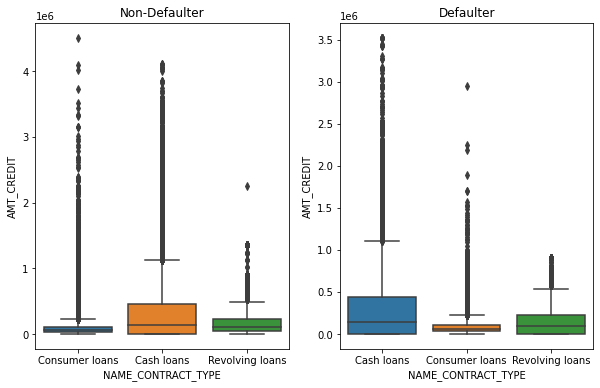

In [127]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = 'AMT_CREDIT', data=df_merged0)
plt.title('Non-Defaulter')
plt.subplot(1,2,2)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = 'AMT_CREDIT', data=df_merged1)
plt.title('Defaulter')
plt.show()

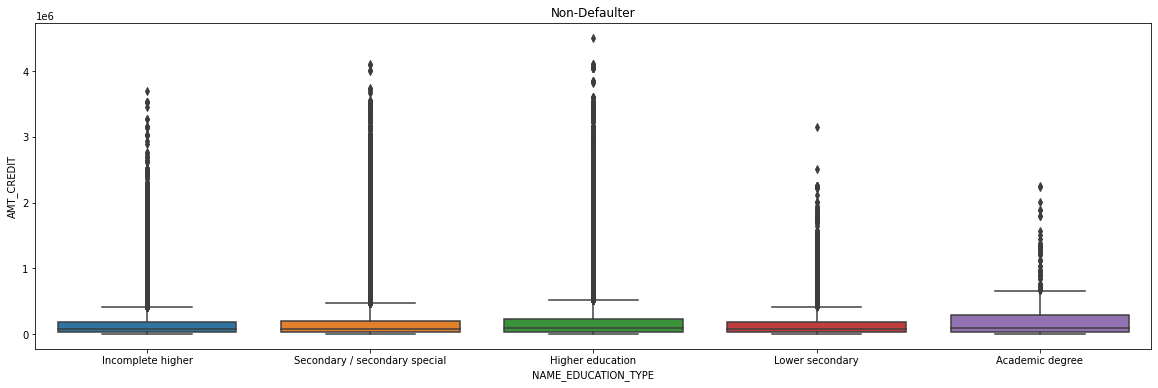

In [128]:
plt.figure(figsize=(20,6))
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AMT_CREDIT', data=df_merged0)
plt.title('Non-Defaulter')
plt.show()

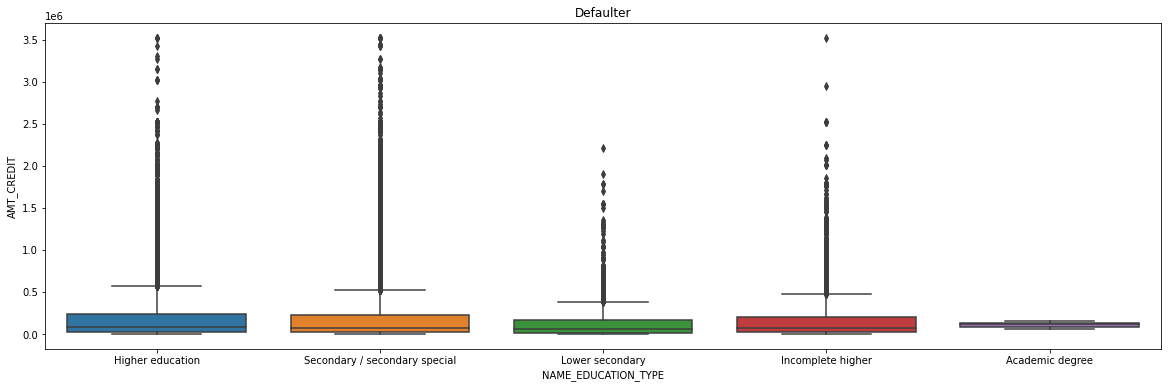

In [129]:
plt.figure(figsize=(20,6))
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AMT_CREDIT', data=df_merged1)
plt.title('Defaulter')
plt.show()


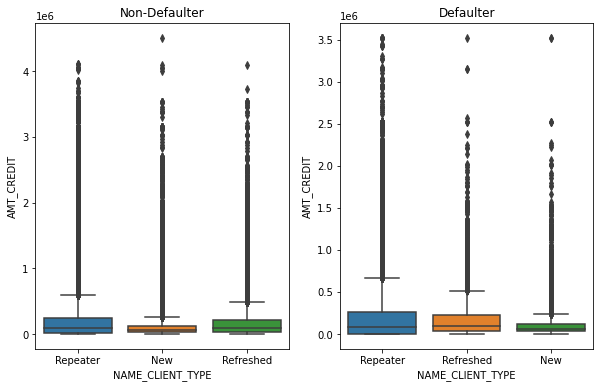

In [130]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'AMT_CREDIT', data=df_merged0)
plt.title('Non-Defaulter')
plt.subplot(1,2,2)
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'AMT_CREDIT', data=df_merged1)
plt.title('Defaulter')
plt.show()

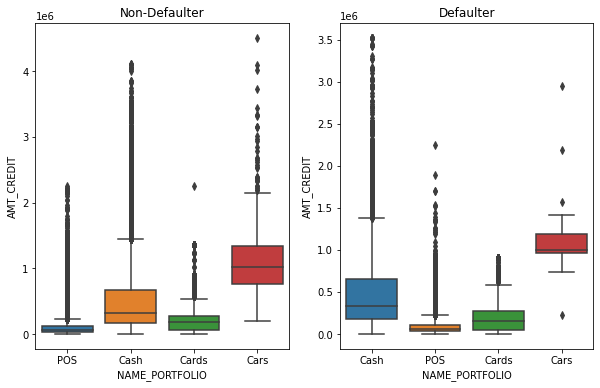

In [131]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT', data=df_merged0)
plt.title('Non-Defaulter')
plt.subplot(1,2,2)
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT', data=df_merged1)
plt.title('Defaulter')
plt.show()

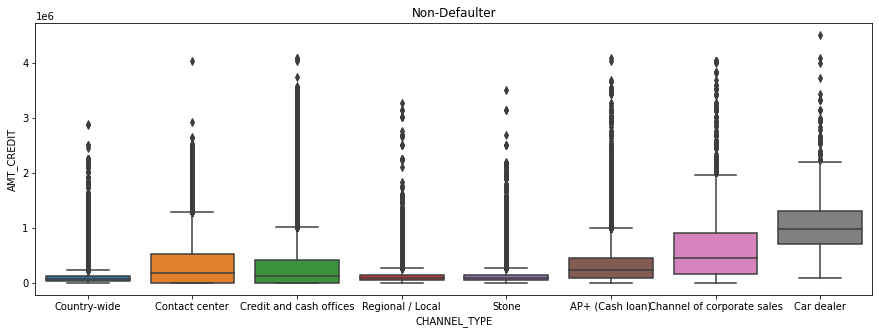

In [132]:
plt.figure(figsize=(15,5))

sns.boxplot(x = "CHANNEL_TYPE", y = 'AMT_CREDIT', data=df_merged0)
plt.title('Non-Defaulter')
plt.show()

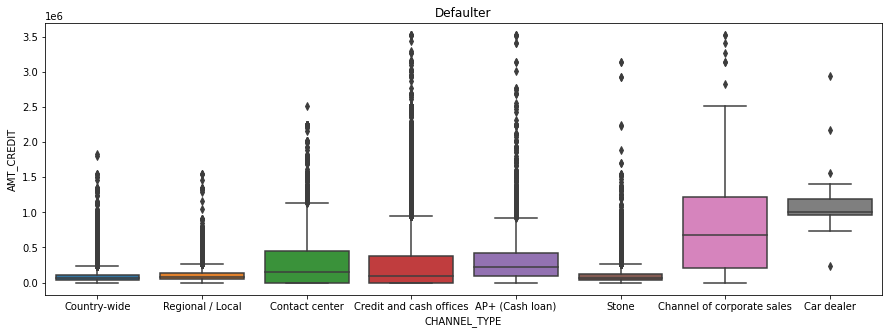

In [133]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CHANNEL_TYPE", y = 'AMT_CREDIT', data=df_merged1)
plt.title('Defaulter')
plt.show()

#### Insight
- Most of the amount credit was cancelled in status
- Repeater client got more loan credit
- Cash loan got more credited.
- Through the contact center channel, more loan got credited.

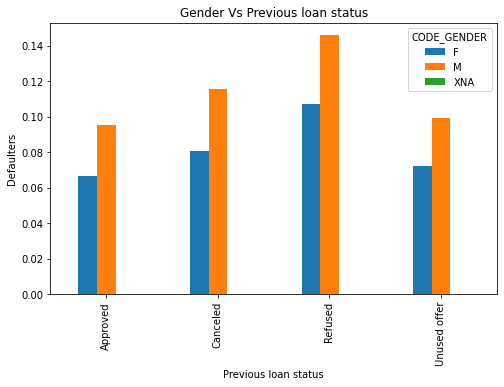

In [134]:
merged_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Gender Vs Previous loan status')
plt.show()


- Male clients are more defaulted than female client. Also, previously refused customer are more defaulted in current application.



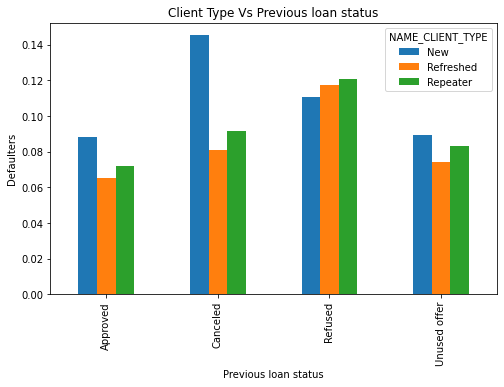

In [135]:
merged_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Client Type Vs Previous loan status')
plt.show()

- Previously cancelled New and Refreshed clients are more defaulted than repeater clients

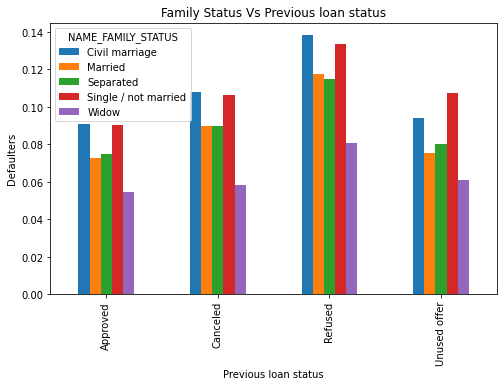

In [136]:
merged_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()


- Client who did civil marriage with previously unused loan offers ar more defaulted currently.